# EDA - Exploratory Data Analysis

- It is the process to know more about the data.
- Exploring the data
- To understand different aspects of data

# Steps

- Data collection
- Find all variables and understand them
- Clean the dataset(if null values present)
- Identify correlated variables
- Choose the right statistical method
- Analyze and Visualize results

# Analysis of IPL Dataset

- Here we are analyzing the dataset of IPL(Indian Premier League), which includes analysis of match information,match season,toss winners,max match winners,etc.

- Number of matches played in each season
- Cities where >40 matches played
- Max no of wins by a team in each season
- Max no of toss winners
- Player with most man of match awards

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
dt=pd.read_excel(r"C:\Users\lenovo\Downloads\matches.xlsx")
dt

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


In [150]:
dt.shape

(636, 18)

In [151]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               636 non-null    int64         
 1   season           636 non-null    int64         
 2   city             629 non-null    object        
 3   date             636 non-null    datetime64[ns]
 4   team1            636 non-null    object        
 5   team2            636 non-null    object        
 6   toss_winner      636 non-null    object        
 7   toss_decision    636 non-null    object        
 8   result           636 non-null    object        
 9   dl_applied       636 non-null    int64         
 10  winner           633 non-null    object        
 11  win_by_runs      636 non-null    int64         
 12  win_by_wickets   636 non-null    int64         
 13  player_of_match  633 non-null    object        
 14  venue            636 non-null    object   

In [152]:
dt.drop(['id','date','umpire1','umpire2','umpire3'],axis=1,inplace=True)
dt

,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,2017,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,2017,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,2016,Raipur,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium
632,2016,Bangalore,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium
633,2016,Delhi,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla
634,2016,Delhi,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla


In [153]:
dt.columns

Index(['season', 'city', 'team1', 'team2', 'toss_winner', 'toss_decision',
       'result', 'dl_applied', 'winner', 'win_by_runs', 'win_by_wickets',
       'player_of_match', 'venue'],
      dtype='object')

# No of matches in each season

In [154]:
dt.season.value_counts()

2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

In [155]:
df=pd.DataFrame({'Season':dt.season.value_counts().index,'Total Matches':dt.season.value_counts().values})
df

,Season,Total Matches
0,2013,76
1,2012,74
2,2011,73
3,2010,60
4,2014,60
5,2016,60
6,2017,59
7,2015,59
8,2008,58
9,2009,57


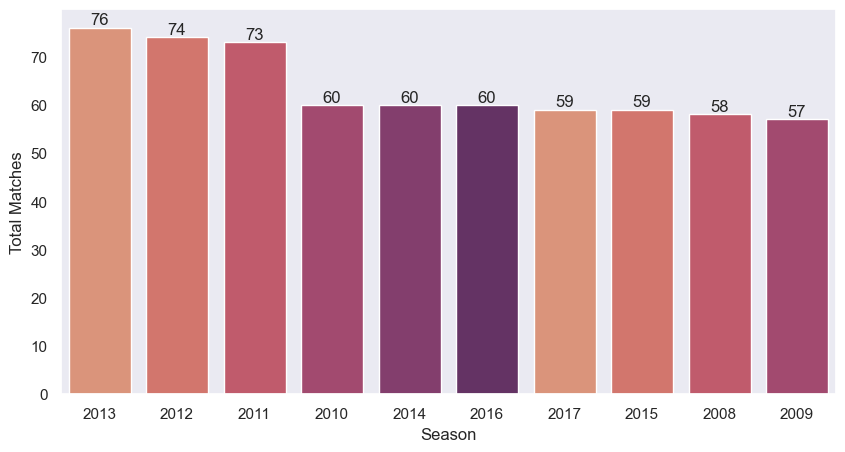

In [156]:
plt.figure(figsize=(10,5),dpi=100)
ax=sns.barplot(x='Season',y='Total Matches',data=df,order=df['Season'],palette=sns.color_palette('flare'))
for i in ax.containers:
        ax.bar_label(i)
plt.show()        

# Number of Cities where matches held

In [11]:
dt.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan],
      dtype=object)

# Number of matches played in a particular city

In [12]:
city=dt.city.value_counts()
city

Mumbai            85
Bangalore         66
Kolkata           61
Delhi             60
Hyderabad         49
Chennai           48
Chandigarh        46
Jaipur            33
Pune              32
Durban            15
Ahmedabad         12
Centurion         12
Visakhapatnam     11
Rajkot            10
Dharamsala         9
Johannesburg       8
Cape Town          7
Abu Dhabi          7
Ranchi             7
Port Elizabeth     7
Cuttack            7
Raipur             6
Sharjah            6
Kochi              5
Indore             5
Kanpur             4
Nagpur             3
Kimberley          3
East London        3
Bloemfontein       2
Name: city, dtype: int64

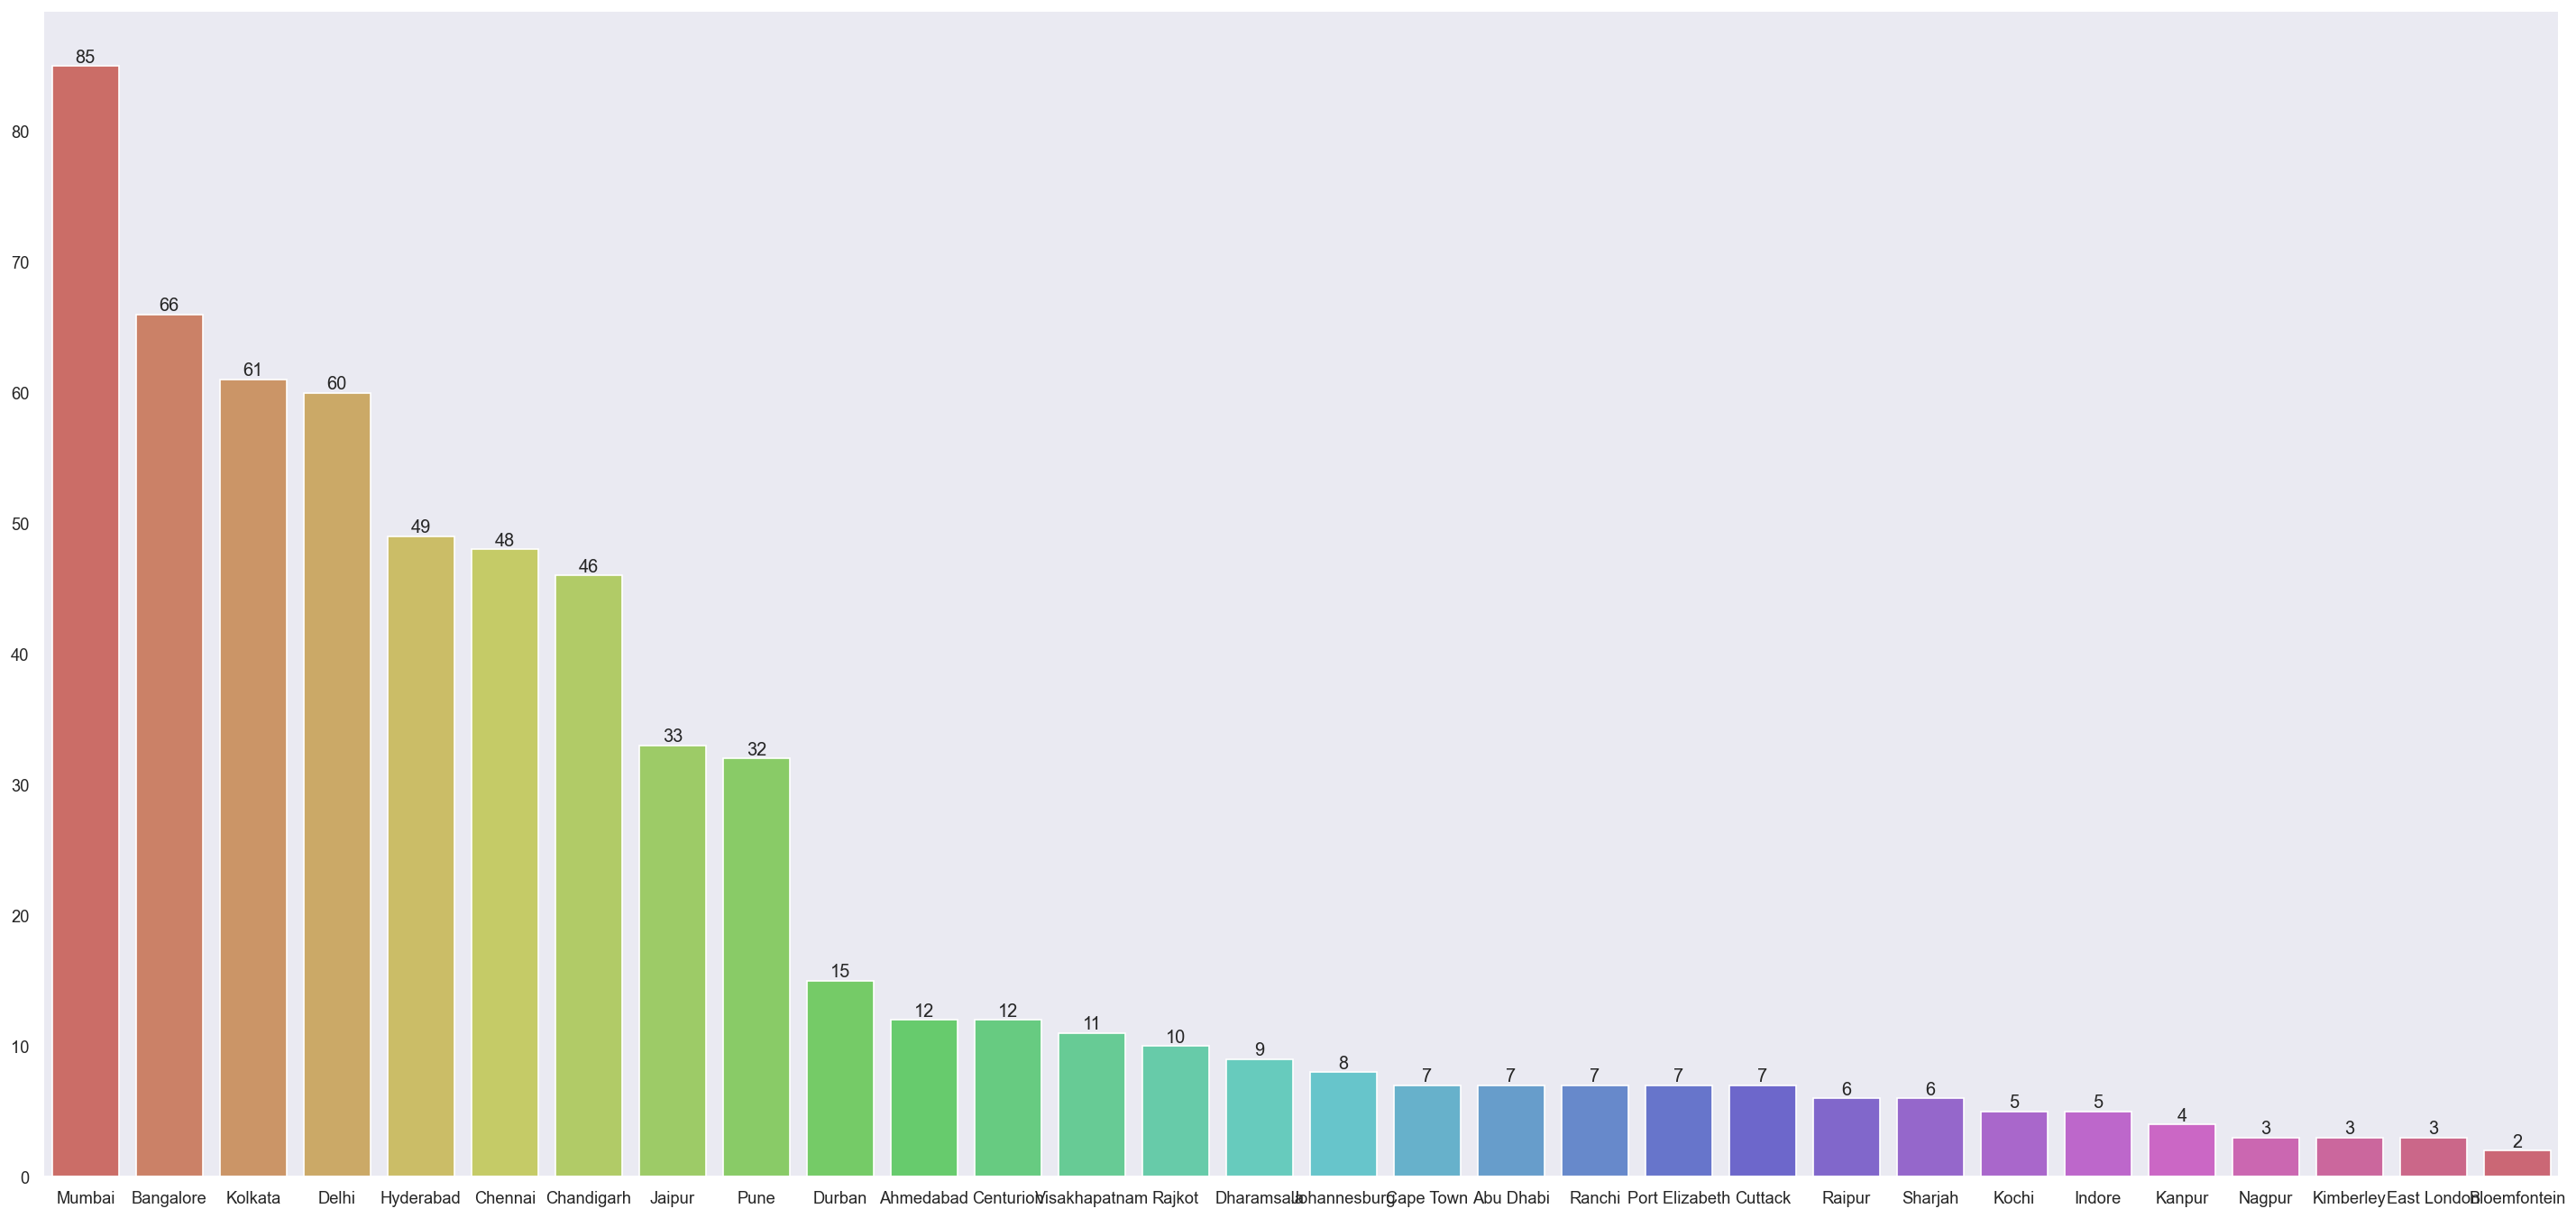

In [61]:
plt.figure(figsize=(30,14),dpi=120)
ax=sns.barplot(x=city.index,y=city.values,palette='hls')
for i in ax.containers:
    ax.bar_label(i)
plt.show()    

# Cities where more then 40 matches have been played

In [14]:
city>40

Mumbai             True
Bangalore          True
Kolkata            True
Delhi              True
Hyderabad          True
Chennai            True
Chandigarh         True
Jaipur            False
Pune              False
Durban            False
Ahmedabad         False
Centurion         False
Visakhapatnam     False
Rajkot            False
Dharamsala        False
Johannesburg      False
Cape Town         False
Abu Dhabi         False
Ranchi            False
Port Elizabeth    False
Cuttack           False
Raipur            False
Sharjah           False
Kochi             False
Indore            False
Kanpur            False
Nagpur            False
Kimberley         False
East London       False
Bloemfontein      False
Name: city, dtype: bool

In [15]:
city[city>40]

Mumbai        85
Bangalore     66
Kolkata       61
Delhi         60
Hyderabad     49
Chennai       48
Chandigarh    46
Name: city, dtype: int64

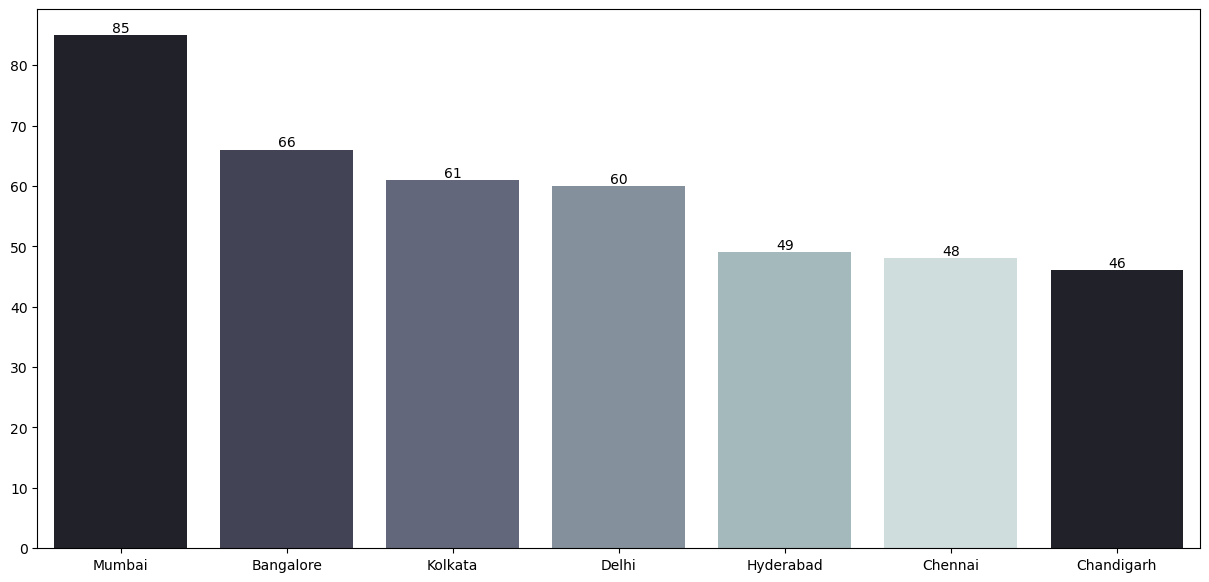

In [16]:
plt.figure(figsize=(15,7),dpi=100)
ax=sns.barplot(x=city[city>40].index,y=city[city>40].values,palette=sns.color_palette('bone'))
for i in ax.containers:
    ax.bar_label(i)
plt.show()    

# Percentage of most matches played in a city

In [17]:
dt.city.value_counts()*100/len(dt)    #using formula of finding % of something.....

Mumbai            13.364780
Bangalore         10.377358
Kolkata            9.591195
Delhi              9.433962
Hyderabad          7.704403
Chennai            7.547170
Chandigarh         7.232704
Jaipur             5.188679
Pune               5.031447
Durban             2.358491
Ahmedabad          1.886792
Centurion          1.886792
Visakhapatnam      1.729560
Rajkot             1.572327
Dharamsala         1.415094
Johannesburg       1.257862
Cape Town          1.100629
Abu Dhabi          1.100629
Ranchi             1.100629
Port Elizabeth     1.100629
Cuttack            1.100629
Raipur             0.943396
Sharjah            0.943396
Kochi              0.786164
Indore             0.786164
Kanpur             0.628931
Nagpur             0.471698
Kimberley          0.471698
East London        0.471698
Bloemfontein       0.314465
Name: city, dtype: float64

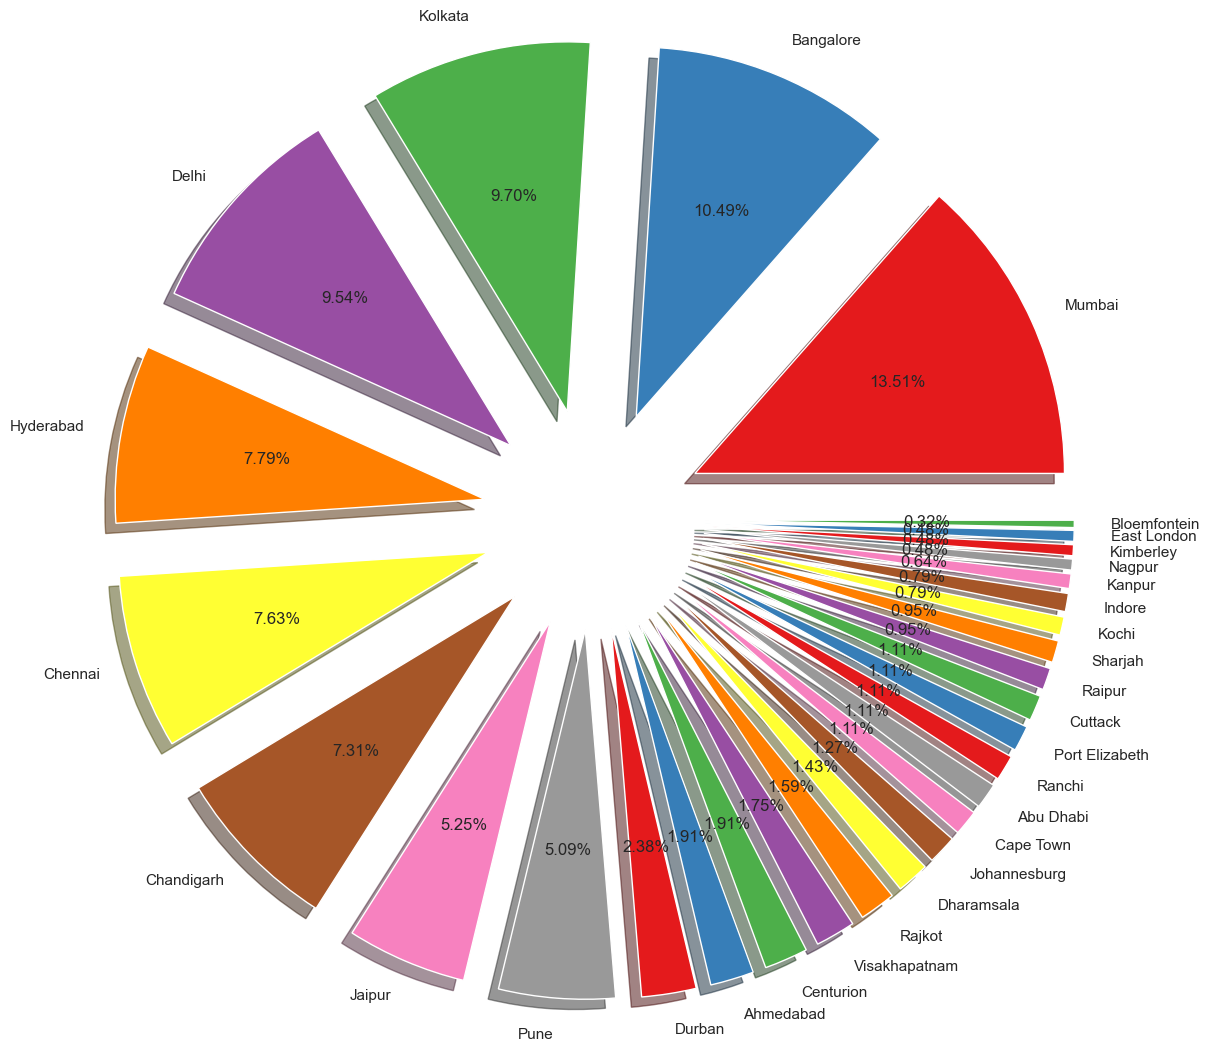

In [142]:
plt.figure(figsize=(12,12),dpi=100)
plt.pie(dt.city.value_counts()*100/len(dt),labels=dt.city.value_counts().index,
        autopct='%.2f%%',shadow=True,explode=[0.3 for i in range(30)],colors=sns.color_palette('Set1'))
plt.show()

# Cities where less then 10 matches have been played

In [19]:
city[city<10]

Dharamsala        9
Johannesburg      8
Cape Town         7
Abu Dhabi         7
Ranchi            7
Port Elizabeth    7
Cuttack           7
Raipur            6
Sharjah           6
Kochi             5
Indore            5
Kanpur            4
Nagpur            3
Kimberley         3
East London       3
Bloemfontein      2
Name: city, dtype: int64

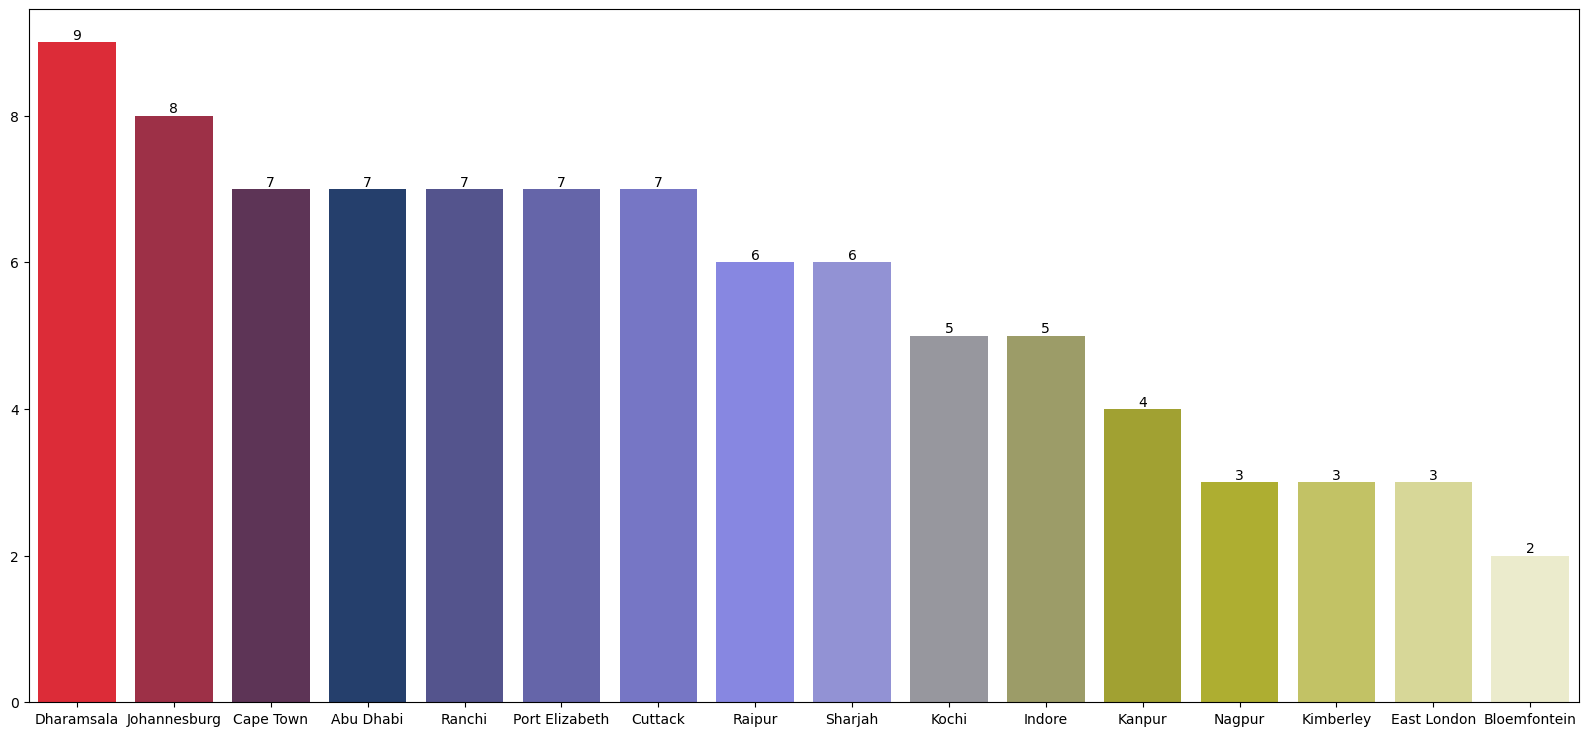

In [20]:
plt.figure(figsize=(20,9),dpi=100)
ax=sns.barplot(x=city[city<10].index,y=city[city<10].values,palette='gist_stern')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

# Name of all winners in each season

In [21]:
dt.winner.unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants'],
      dtype=object)

# Total no of wins by each team in all seasons

In [22]:
dt.winner.value_counts()

Mumbai Indians                 92
Chennai Super Kings            79
Kolkata Knight Riders          77
Royal Challengers Bangalore    73
Kings XI Punjab                70
Rajasthan Royals               63
Delhi Daredevils               62
Sunrisers Hyderabad            42
Deccan Chargers                29
Gujarat Lions                  13
Pune Warriors                  12
Rising Pune Supergiant         10
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: winner, dtype: int64

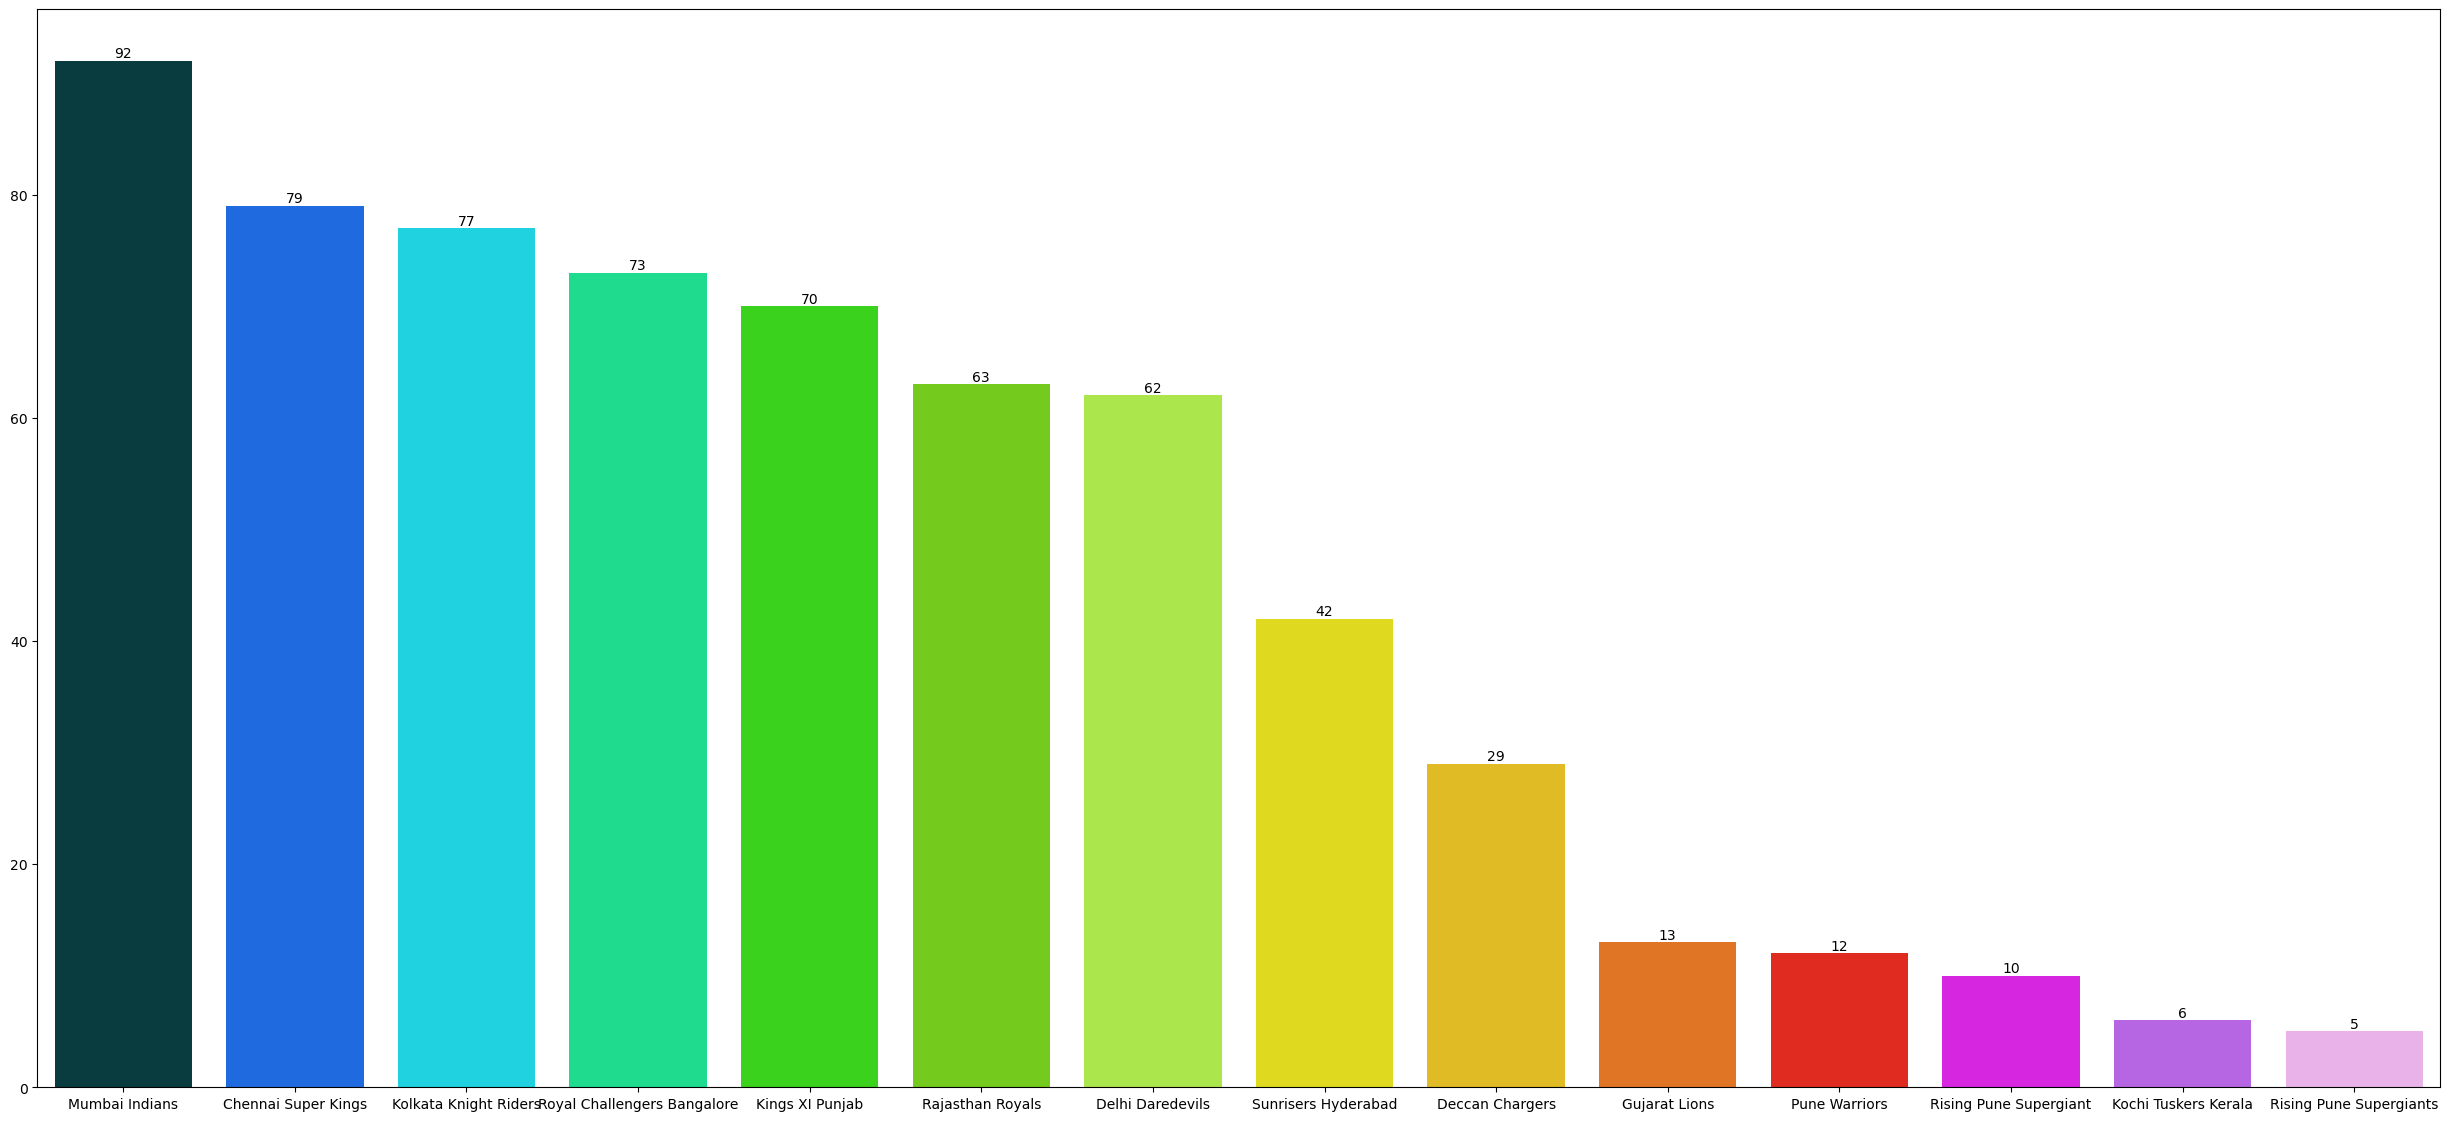

In [23]:
plt.figure(figsize=(31,14),dpi=100)
ax=sns.barplot(x=dt.winner.value_counts().index,y=dt.winner.value_counts().values,palette='gist_ncar')
for i in ax.containers:
    ax.bar_label(i)
plt.show()    

# Total no of wins by each team in season 2014

In [24]:
dt[dt.season==2014]['winner'].value_counts()

Kings XI Punjab                12
Kolkata Knight Riders          11
Chennai Super Kings            10
Rajasthan Royals                7
Mumbai Indians                  7
Sunrisers Hyderabad             6
Royal Challengers Bangalore     5
Delhi Daredevils                2
Name: winner, dtype: int64

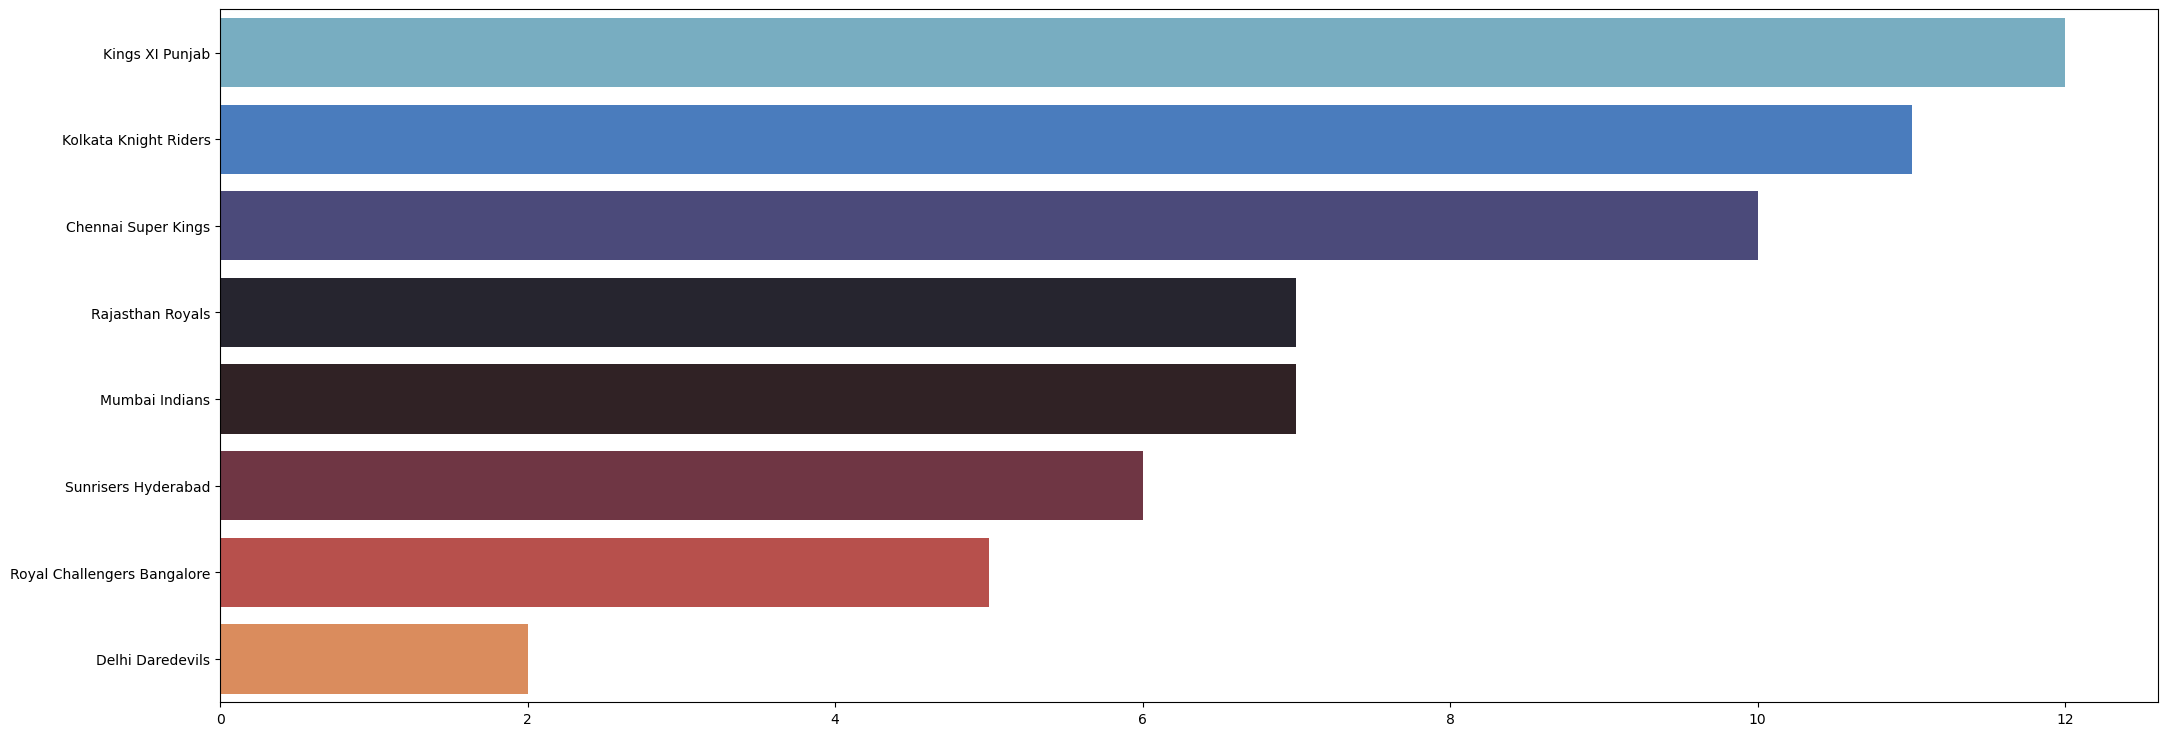

In [25]:
plt.figure(figsize=(25,9),dpi=100)
ax=sns.barplot(y=dt[dt.season==2014]['winner'].value_counts().index,
               x=dt[dt.season==2014]['winner'].value_counts().values,palette='icefire')
plt.show()

# Maximum no of wins by a team in each season

In [26]:
def max_wins(year):
    return dt[dt.season==year]['winner'].value_counts()

max_wins(2014)

Kings XI Punjab                12
Kolkata Knight Riders          11
Chennai Super Kings            10
Rajasthan Royals                7
Mumbai Indians                  7
Sunrisers Hyderabad             6
Royal Challengers Bangalore     5
Delhi Daredevils                2
Name: winner, dtype: int64

In [27]:
max_wins(2015)

Chennai Super Kings            10
Mumbai Indians                 10
Royal Challengers Bangalore     8
Kolkata Knight Riders           7
Rajasthan Royals                7
Sunrisers Hyderabad             7
Delhi Daredevils                5
Kings XI Punjab                 3
Name: winner, dtype: int64

In [28]:
max_wins(2016)

Sunrisers Hyderabad            11
Gujarat Lions                   9
Royal Challengers Bangalore     9
Kolkata Knight Riders           8
Mumbai Indians                  7
Delhi Daredevils                7
Rising Pune Supergiants         5
Kings XI Punjab                 4
Name: winner, dtype: int64

In [29]:
max_wins(2017)

Mumbai Indians                 12
Rising Pune Supergiant         10
Kolkata Knight Riders           9
Sunrisers Hyderabad             8
Kings XI Punjab                 7
Delhi Daredevils                6
Gujarat Lions                   4
Royal Challengers Bangalore     3
Name: winner, dtype: int64

In [30]:
def bar_plot(year):
    return sns.barplot(y=dt[dt.season==year]['winner'].value_counts().index,
                      x=dt[dt.season==year]['winner'].value_counts().values,palette='gist_heat_r')


In [31]:
import warnings
warnings.filterwarnings('ignore')

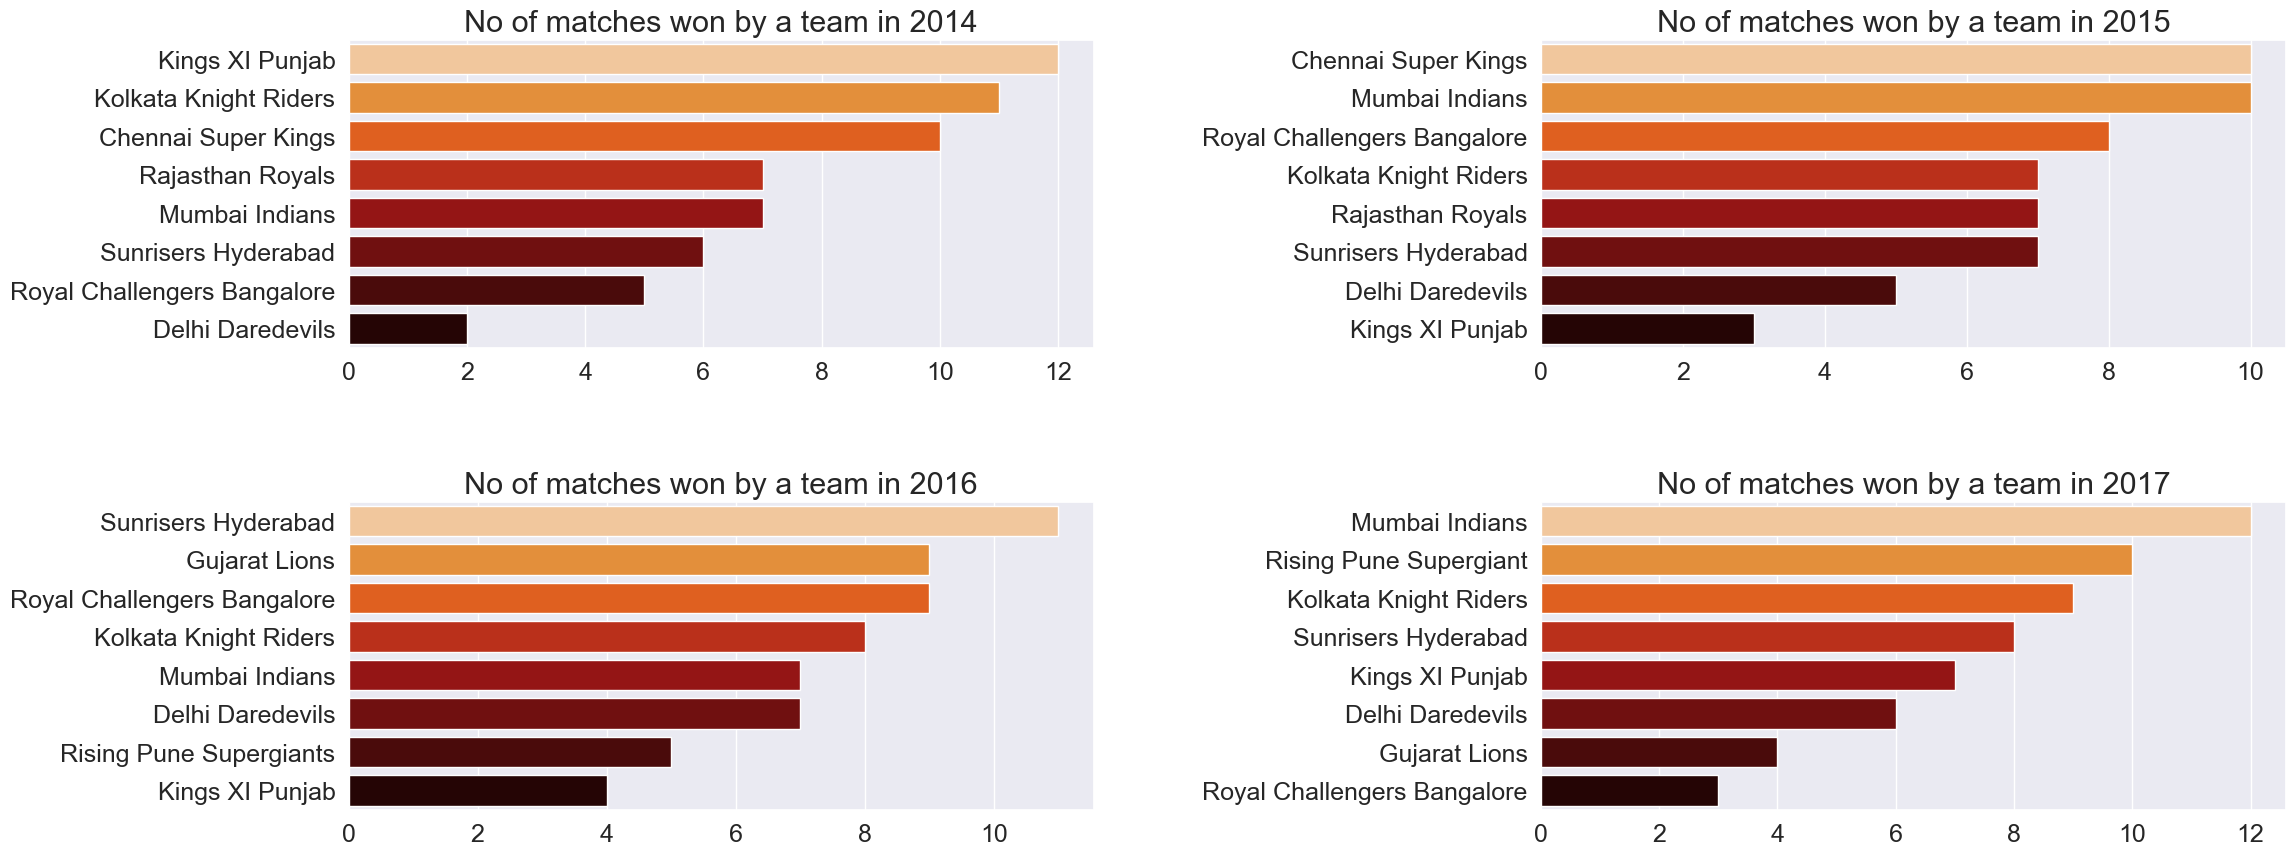

In [32]:
sns.set_theme(style='darkgrid')
fig,axes=plt.subplots(2,2,figsize=(25,10))

plt.subplot(221)
ax=bar_plot(2014)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('No of matches won by a team in 2014',fontsize=22)

plt.subplot(222)
ax=bar_plot(2015)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('No of matches won by a team in 2015',fontsize=22)

plt.subplot(223)
ax=bar_plot(2016)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('No of matches won by a team in 2016',fontsize=22)

plt.subplot(224)
ax=bar_plot(2017)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('No of matches won by a team in 2017',fontsize=22)

plt.subplots_adjust(hspace=0.5,wspace=0.6)

# No of matches in each venue in the season 2014

In [33]:
dt[dt.season==2014]['venue'].value_counts()

Sheikh Zayed Stadium                          7
Dubai International Cricket Stadium           7
Sharjah Cricket Stadium                       6
Wankhede Stadium                              6
M Chinnaswamy Stadium                         6
Feroz Shah Kotla                              5
JSCA International Stadium Complex            4
Sardar Patel Stadium, Motera                  4
Rajiv Gandhi International Stadium, Uppal     4
Eden Gardens                                  4
Barabati Stadium                              3
Punjab Cricket Association Stadium, Mohali    3
Brabourne Stadium                             1
Name: venue, dtype: int64

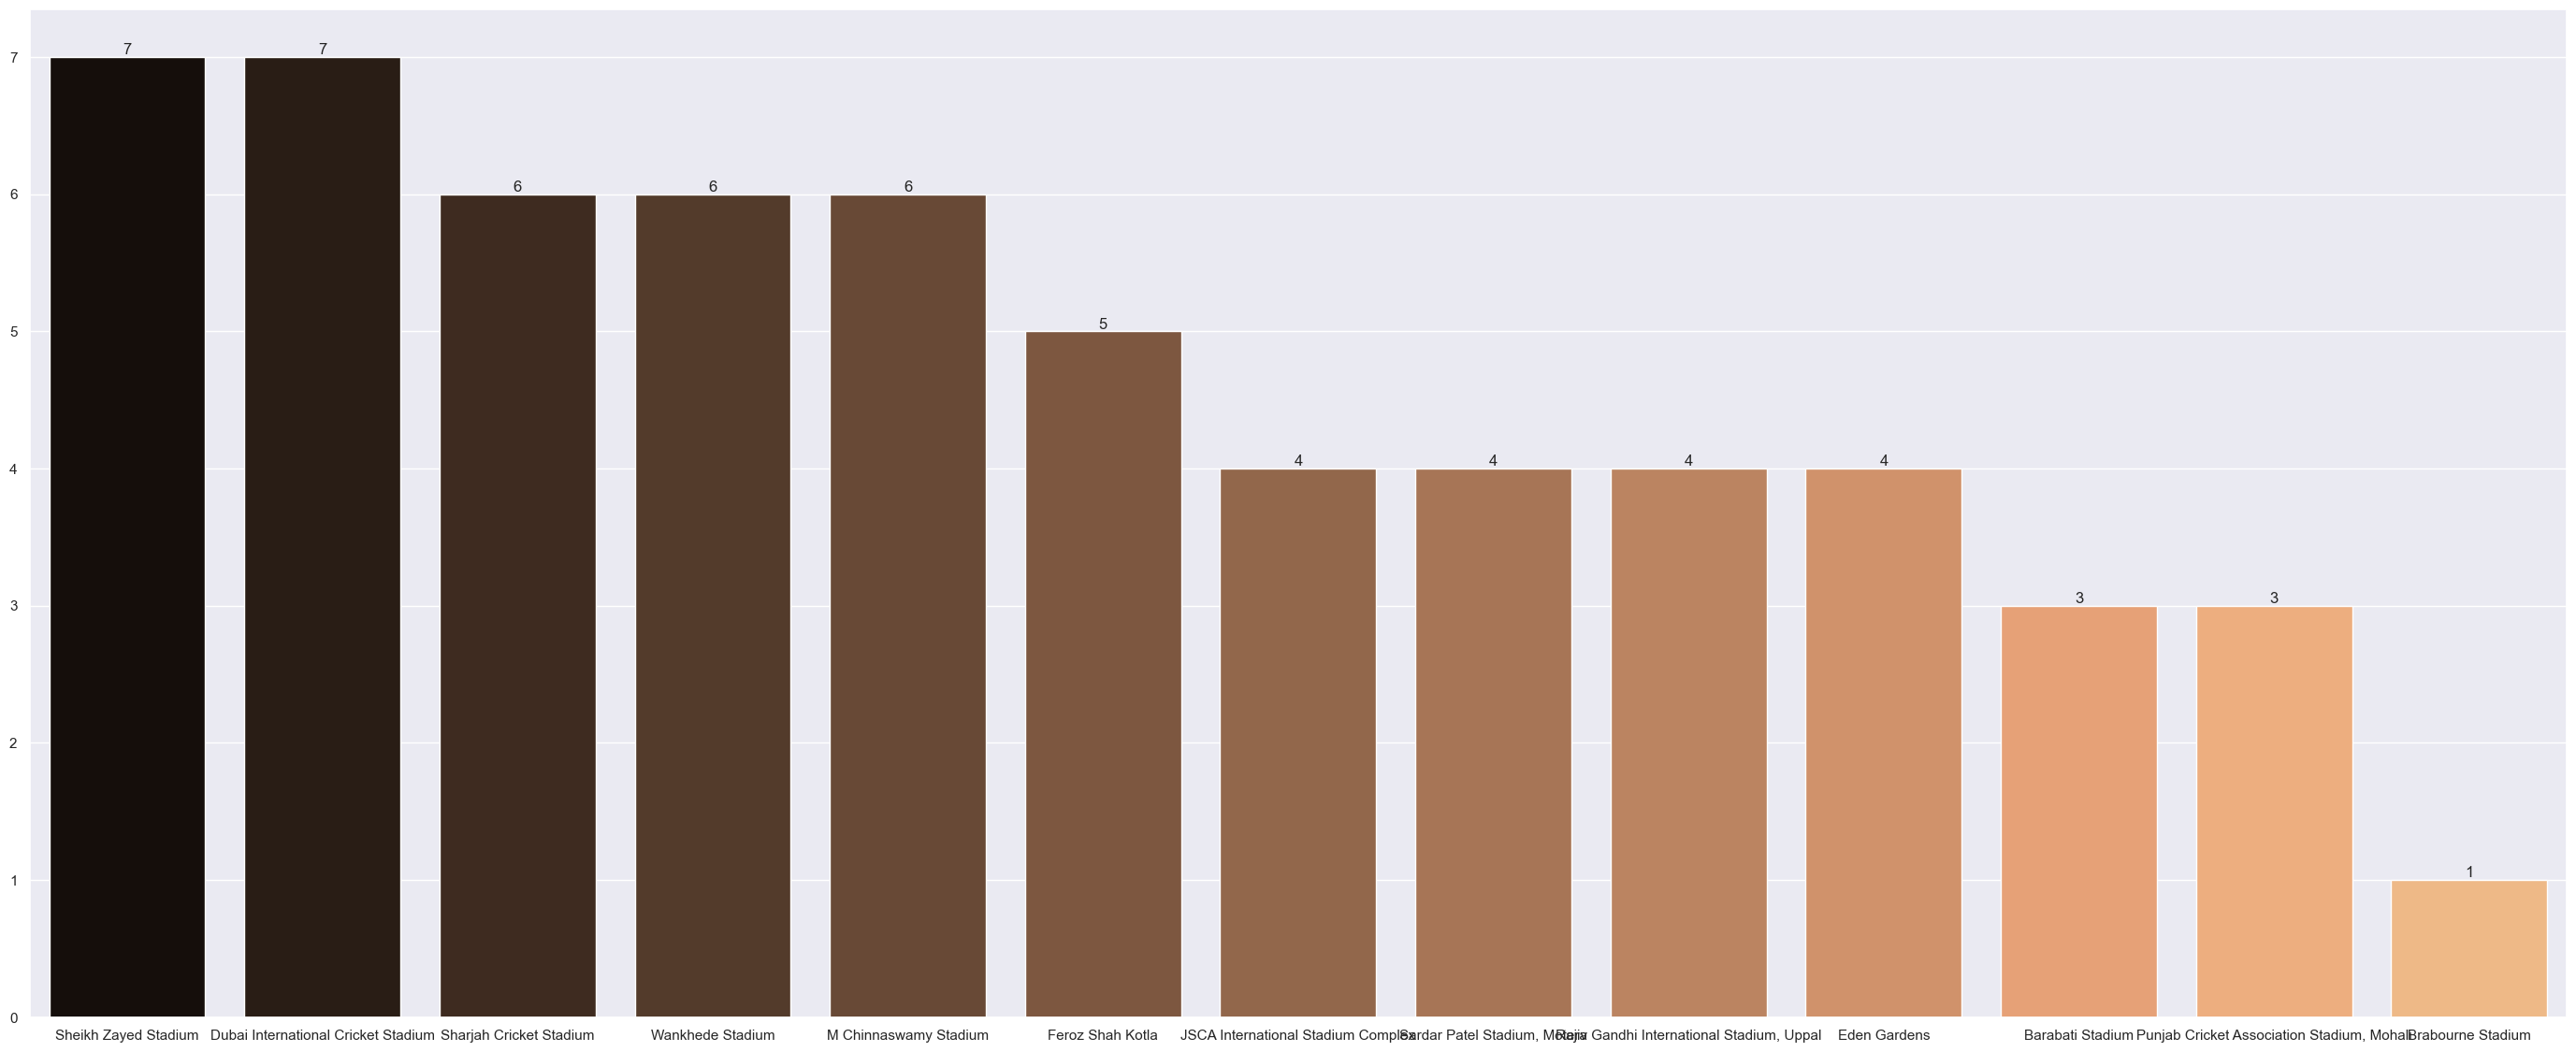

In [34]:
plt.figure(figsize=(35,14),dpi=100)
ax=sns.barplot(x=dt[dt.season==2014]['venue'].value_counts().index,
               y=dt[dt.season==2014]['venue'].value_counts().values,palette='copper')
for i in ax.containers:
    ax.bar_label(i)

# Venue wise no of matches won by a team in season 2014

In [35]:
df=dt[dt['season']==2014].groupby('venue').winner.value_counts()
df

venue                                       winner                     
Barabati Stadium                            Kolkata Knight Riders          2
                                            Kings XI Punjab                1
Brabourne Stadium                           Chennai Super Kings            1
Dubai International Cricket Stadium         Chennai Super Kings            2
                                            Sunrisers Hyderabad            2
                                            Delhi Daredevils               1
                                            Kings XI Punjab                1
                                            Royal Challengers Bangalore    1
Eden Gardens                                Kolkata Knight Riders          4
Feroz Shah Kotla                            Chennai Super Kings            1
                                            Kings XI Punjab                1
                                            Kolkata Knight Riders          1
    

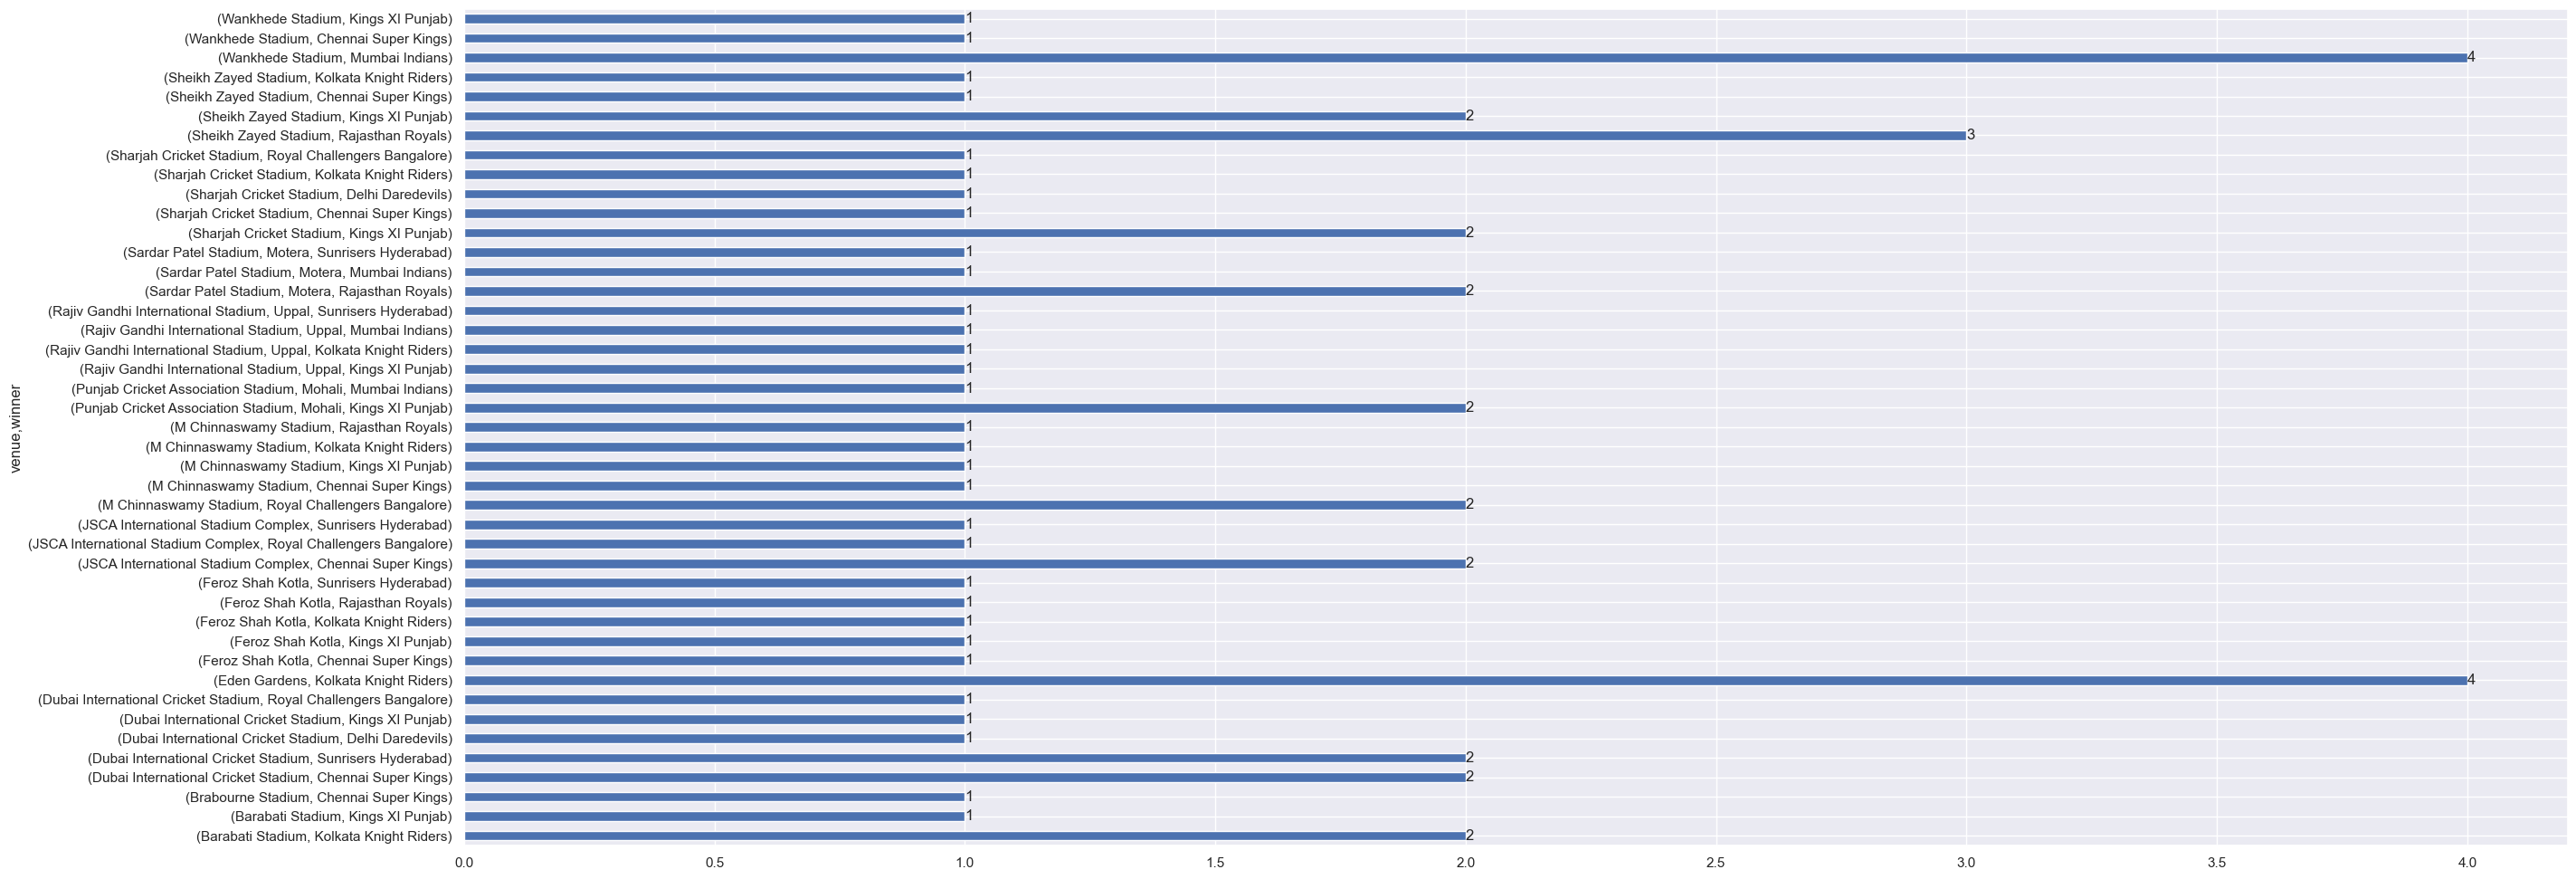

In [36]:
plt.figure(figsize=(30,12),dpi=100)
ax=df.plot.barh()
for i in ax.containers:
    ax.bar_label(i)
plt.show()

# Top 5 venues where max no of matches held from 2008-2017

In [131]:
dt.venue.value_counts().head(5)

M Chinnaswamy Stadium                        66
Eden Gardens                                 61
Feroz Shah Kotla                             60
Wankhede Stadium                             57
Rajiv Gandhi International Stadium, Uppal    49
Name: venue, dtype: int64

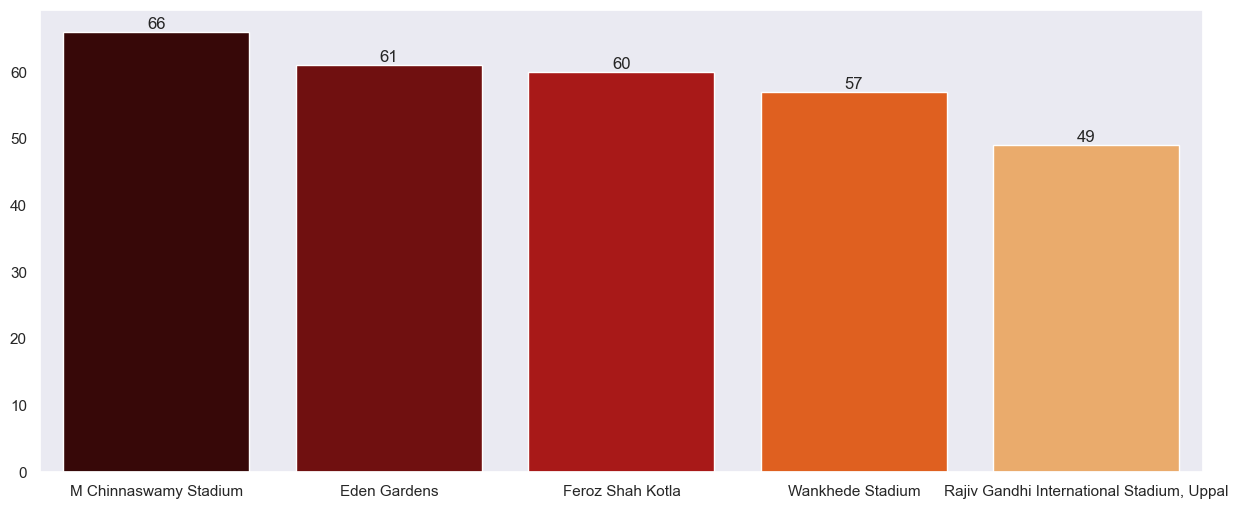

In [141]:
plt.figure(figsize=(15,6),dpi=100)
ax=sns.barplot(x=dt.venue.value_counts().head(5).index,y=dt.venue.value_counts().head(5).values,palette='gist_heat')
for i in ax.containers:
    ax.bar_label(i)
plt.show()    

# No of toss wins by each team in 2017

In [126]:
dt[dt['season']==2017].groupby('season').toss_winner.value_counts()

season  toss_winner                
2017    Mumbai Indians                 11
        Kolkata Knight Riders           9
        Royal Challengers Bangalore     9
        Delhi Daredevils                8
        Gujarat Lions                   7
        Rising Pune Supergiant          6
        Sunrisers Hyderabad             5
        Kings XI Punjab                 4
Name: toss_winner, dtype: int64

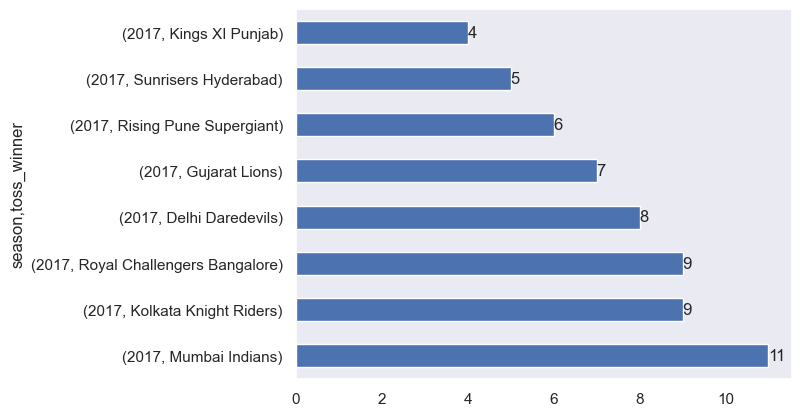

In [127]:
ax=dt[dt['season']==2017].groupby('season').toss_winner.value_counts().plot.barh()
for i in ax.containers:
    ax.bar_label(i)
plt.show()

# Maximum toss winner in each season

In [41]:
def max_toss_winner(year):
    return dt[dt.season==year]['toss_winner'].value_counts()    ### by using function....... 

max_toss_winner(2008)     # we can now call the func as many times as we want it to......

Rajasthan Royals               11
Deccan Chargers                 9
Mumbai Indians                  8
Kings XI Punjab                 8
Kolkata Knight Riders           6
Delhi Daredevils                6
Royal Challengers Bangalore     5
Chennai Super Kings             5
Name: toss_winner, dtype: int64

In [42]:
max_toss_winner(2009)    

Deccan Chargers                10
Delhi Daredevils                9
Royal Challengers Bangalore     8
Chennai Super Kings             7
Kolkata Knight Riders           7
Kings XI Punjab                 6
Mumbai Indians                  6
Rajasthan Royals                4
Name: toss_winner, dtype: int64

In [43]:
max_toss_winner(2011)

Kings XI Punjab                10
Chennai Super Kings             9
Delhi Daredevils                9
Kochi Tuskers Kerala            8
Rajasthan Royals                7
Kolkata Knight Riders           7
Mumbai Indians                  6
Royal Challengers Bangalore     6
Deccan Chargers                 6
Pune Warriors                   5
Name: toss_winner, dtype: int64

In [44]:
max_toss_winner(2013)

Kolkata Knight Riders          12
Mumbai Indians                 12
Rajasthan Royals               11
Pune Warriors                   9
Chennai Super Kings             8
Kings XI Punjab                 7
Sunrisers Hyderabad             7
Royal Challengers Bangalore     5
Delhi Daredevils                5
Name: toss_winner, dtype: int64

In [45]:
def bar_plot(year):
    return sns.barplot(y=dt[dt.season==year]['toss_winner'].value_counts().index,
                          x=dt[dt.season==year]['toss_winner'].value_counts().values,palette='viridis_r')

In [46]:
import warnings
warnings.filterwarnings('ignore')

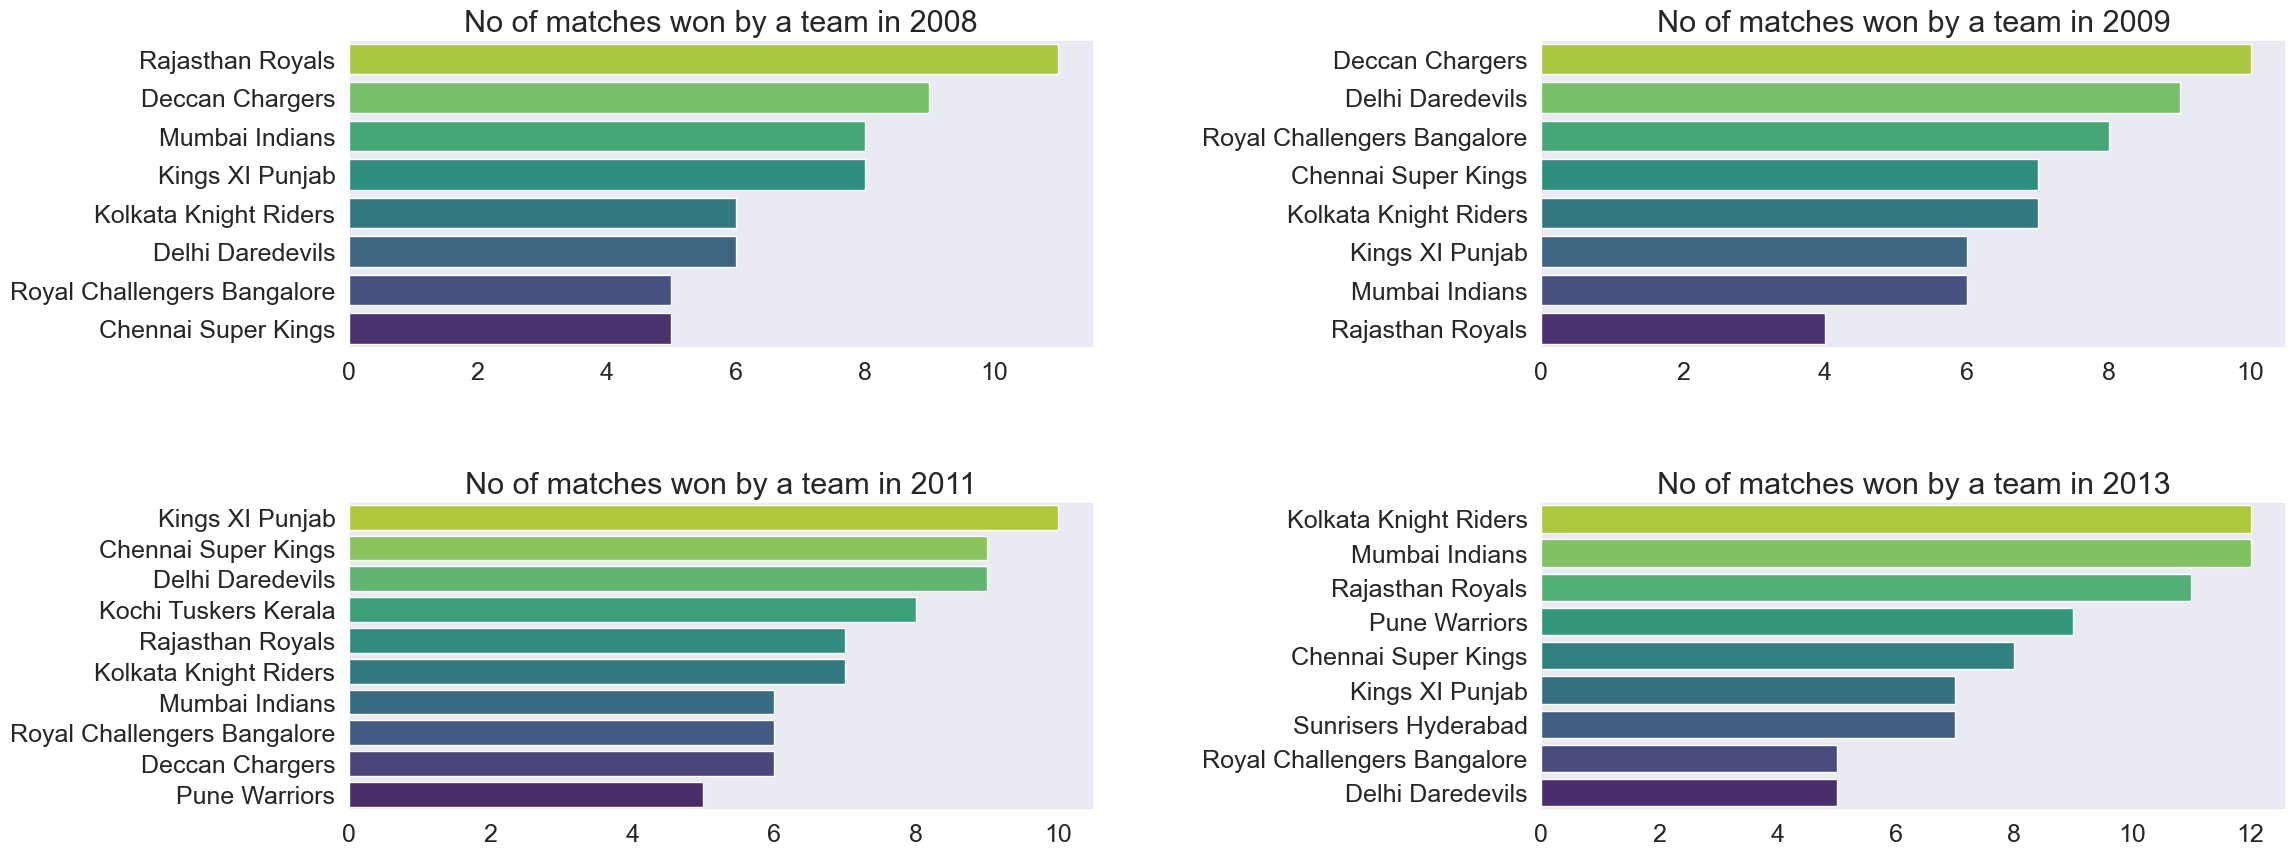

In [47]:
sns.set_theme(style='dark')
fig,axes=plt.subplots(4,4,figsize=(25,10))

plt.subplot(221)
ax=bar_plot(2008)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('No of matches won by a team in 2008',fontsize=22)

plt.subplot(222)
ax=bar_plot(2009)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('No of matches won by a team in 2009',fontsize=22)

plt.subplot(223)
ax=bar_plot(2011)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('No of matches won by a team in 2011',fontsize=22)

plt.subplot(224)
ax=bar_plot(2013)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('No of matches won by a team in 2013',fontsize=22)

plt.subplots_adjust(hspace=0.5,wspace=0.6)

In [48]:
def max_toss_winner(year):
    return dt[dt.season==year]['toss_winner'].value_counts().head(1)  #using head() to extract only the max toss_winner name

max_toss_winner(2017)

Mumbai Indians    11
Name: toss_winner, dtype: int64

# Maximum toss winner in each season using for loop

In [49]:
for i in dt.season.unique():
    print(i,max_toss_winner(i))
    print()

2017 Mumbai Indians    11
Name: toss_winner, dtype: int64

2008 Rajasthan Royals    11
Name: toss_winner, dtype: int64

2009 Deccan Chargers    10
Name: toss_winner, dtype: int64

2010 Chennai Super Kings    10
Name: toss_winner, dtype: int64

2011 Kings XI Punjab    10
Name: toss_winner, dtype: int64

2012 Mumbai Indians    11
Name: toss_winner, dtype: int64

2013 Kolkata Knight Riders    12
Name: toss_winner, dtype: int64

2014 Chennai Super Kings    10
Name: toss_winner, dtype: int64

2015 Chennai Super Kings    10
Name: toss_winner, dtype: int64

2016 Sunrisers Hyderabad    10
Name: toss_winner, dtype: int64



In [50]:
for i in dt.season.unique():                                                     #removing the name & dtype part.......
    print(i,max_toss_winner(i).index[0],max_toss_winner(i).values[0],sep='---')  #using sep='---' for a better look......
    print()

2017---Mumbai Indians---11

2008---Rajasthan Royals---11

2009---Deccan Chargers---10

2010---Chennai Super Kings---10

2011---Kings XI Punjab---10

2012---Mumbai Indians---11

2013---Kolkata Knight Riders---12

2014---Chennai Super Kings---10

2015---Chennai Super Kings---10

2016---Sunrisers Hyderabad---10



# Player with maximum no of player_of_match award in the season 2010

In [51]:
dt[dt.season==2010]['player_of_match'].value_counts()

SR Tendulkar        4
JH Kallis           3
A Symonds           3
SC Ganguly          2
KP Pietersen        2
YK Pathan           2
M Vijay             2
KA Pollard          2
SK Raina            2
G Gambhir           2
MK Tiwary           2
MS Dhoni            2
JD Unadkat          1
RJ Harris           1
MJ Lumb             1
TL Suman            1
DE Bollinger        1
KC Sangakkara       1
R Vinay Kumar       1
PP Chawla           1
Harmeet Singh       1
M Kartik            1
SK Warne            1
RG Sharma           1
R McLaren           1
R Ashwin            1
AD Mathews          1
PD Collingwood      1
AC Voges            1
WPUJC Vaas          1
V Sehwag            1
ML Hayden           1
AA Jhunjhunwala     1
J Theron            1
RV Uthappa          1
KM Jadhav           1
DPMD Jayawardene    1
NV Ojha             1
Harbhajan Singh     1
DA Warner           1
SL Malinga          1
KD Karthik          1
AT Rayudu           1
A Kumble            1
Name: player_of_match, dtype: in

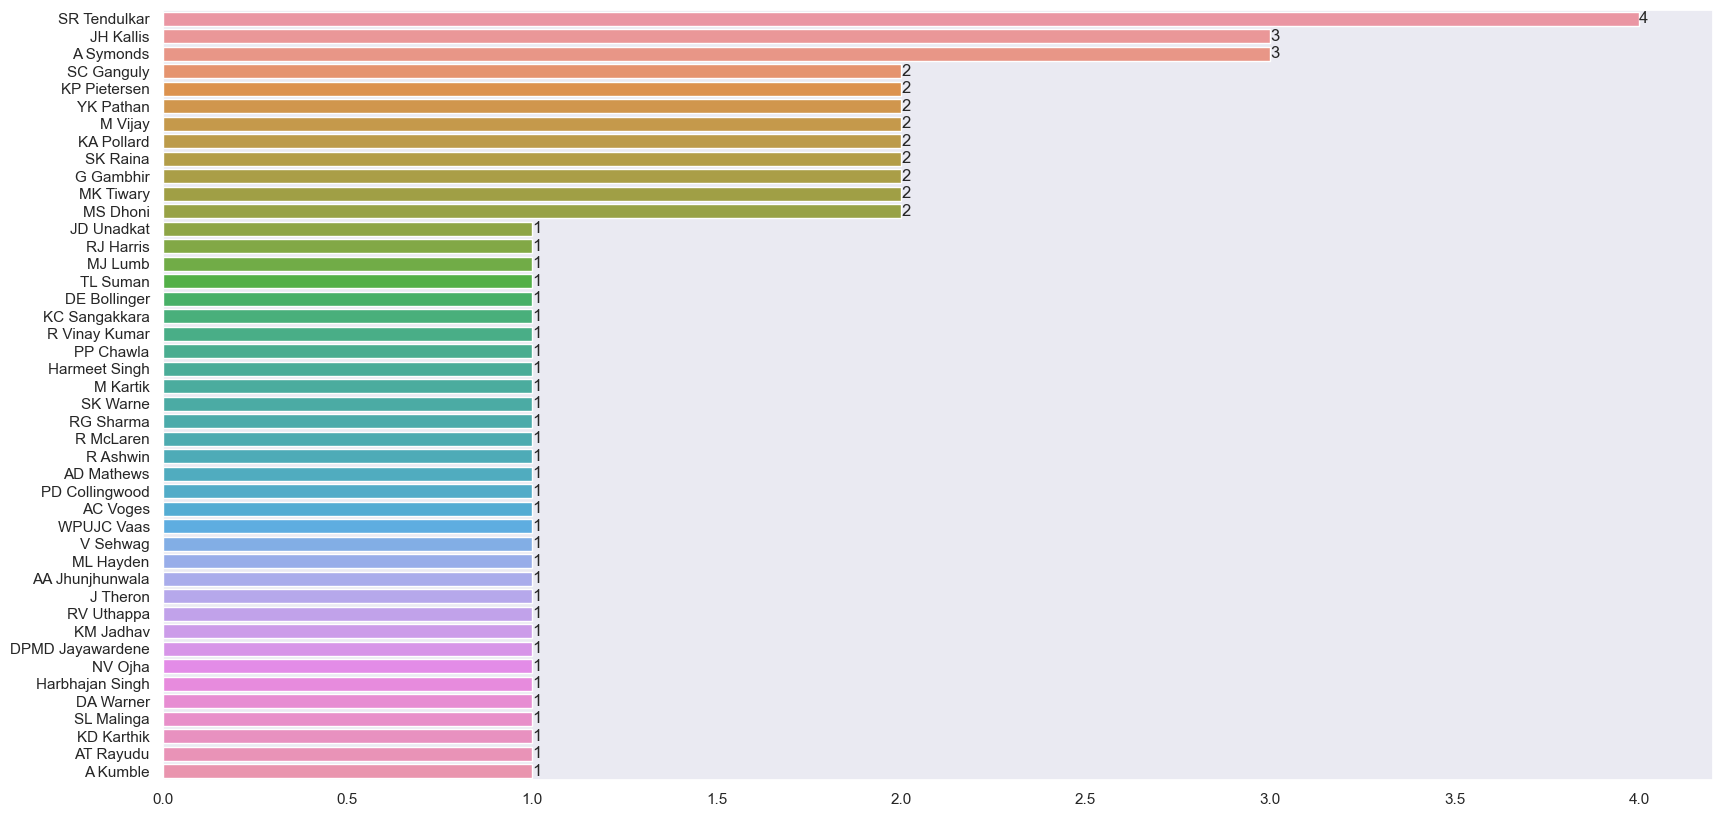

In [52]:
plt.figure(figsize=(20,10),dpi=100)
ax=sns.barplot(y=dt[dt.season==2010]['player_of_match'].value_counts().index,
            x=dt[dt.season==2010]['player_of_match'].value_counts().values)
for i in ax.containers:
    ax.bar_label(i)
plt.show()    

# Player with minimum man of match award in each year

In [53]:
year=[]
name=[]
award=[]
for i in dt.season.unique():
    year.append(i)
    x=dt[dt.season==i]['player_of_match'].value_counts()
    name.append(x.index[-1])
    award.append(x[-1])

In [54]:
name

['KV Sharma',
 'SK Raina',
 'A Kumble',
 'A Kumble',
 'SK Raina',
 'MS Bisla',
 'Harbhajan Singh',
 'MK Pandey',
 'RG Sharma',
 'BCJ Cutting']

In [55]:
award

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [56]:
year

[2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

In [57]:
min_man_of_match=pd.DataFrame({'Year':year,'Name':name,'Award':award})
min_man_of_match

,Year,Name,Award
0,2017,KV Sharma,1
1,2008,SK Raina,1
2,2009,A Kumble,1
3,2010,A Kumble,1
4,2011,SK Raina,1
5,2012,MS Bisla,1
6,2013,Harbhajan Singh,1
7,2014,MK Pandey,1
8,2015,RG Sharma,1
9,2016,BCJ Cutting,1


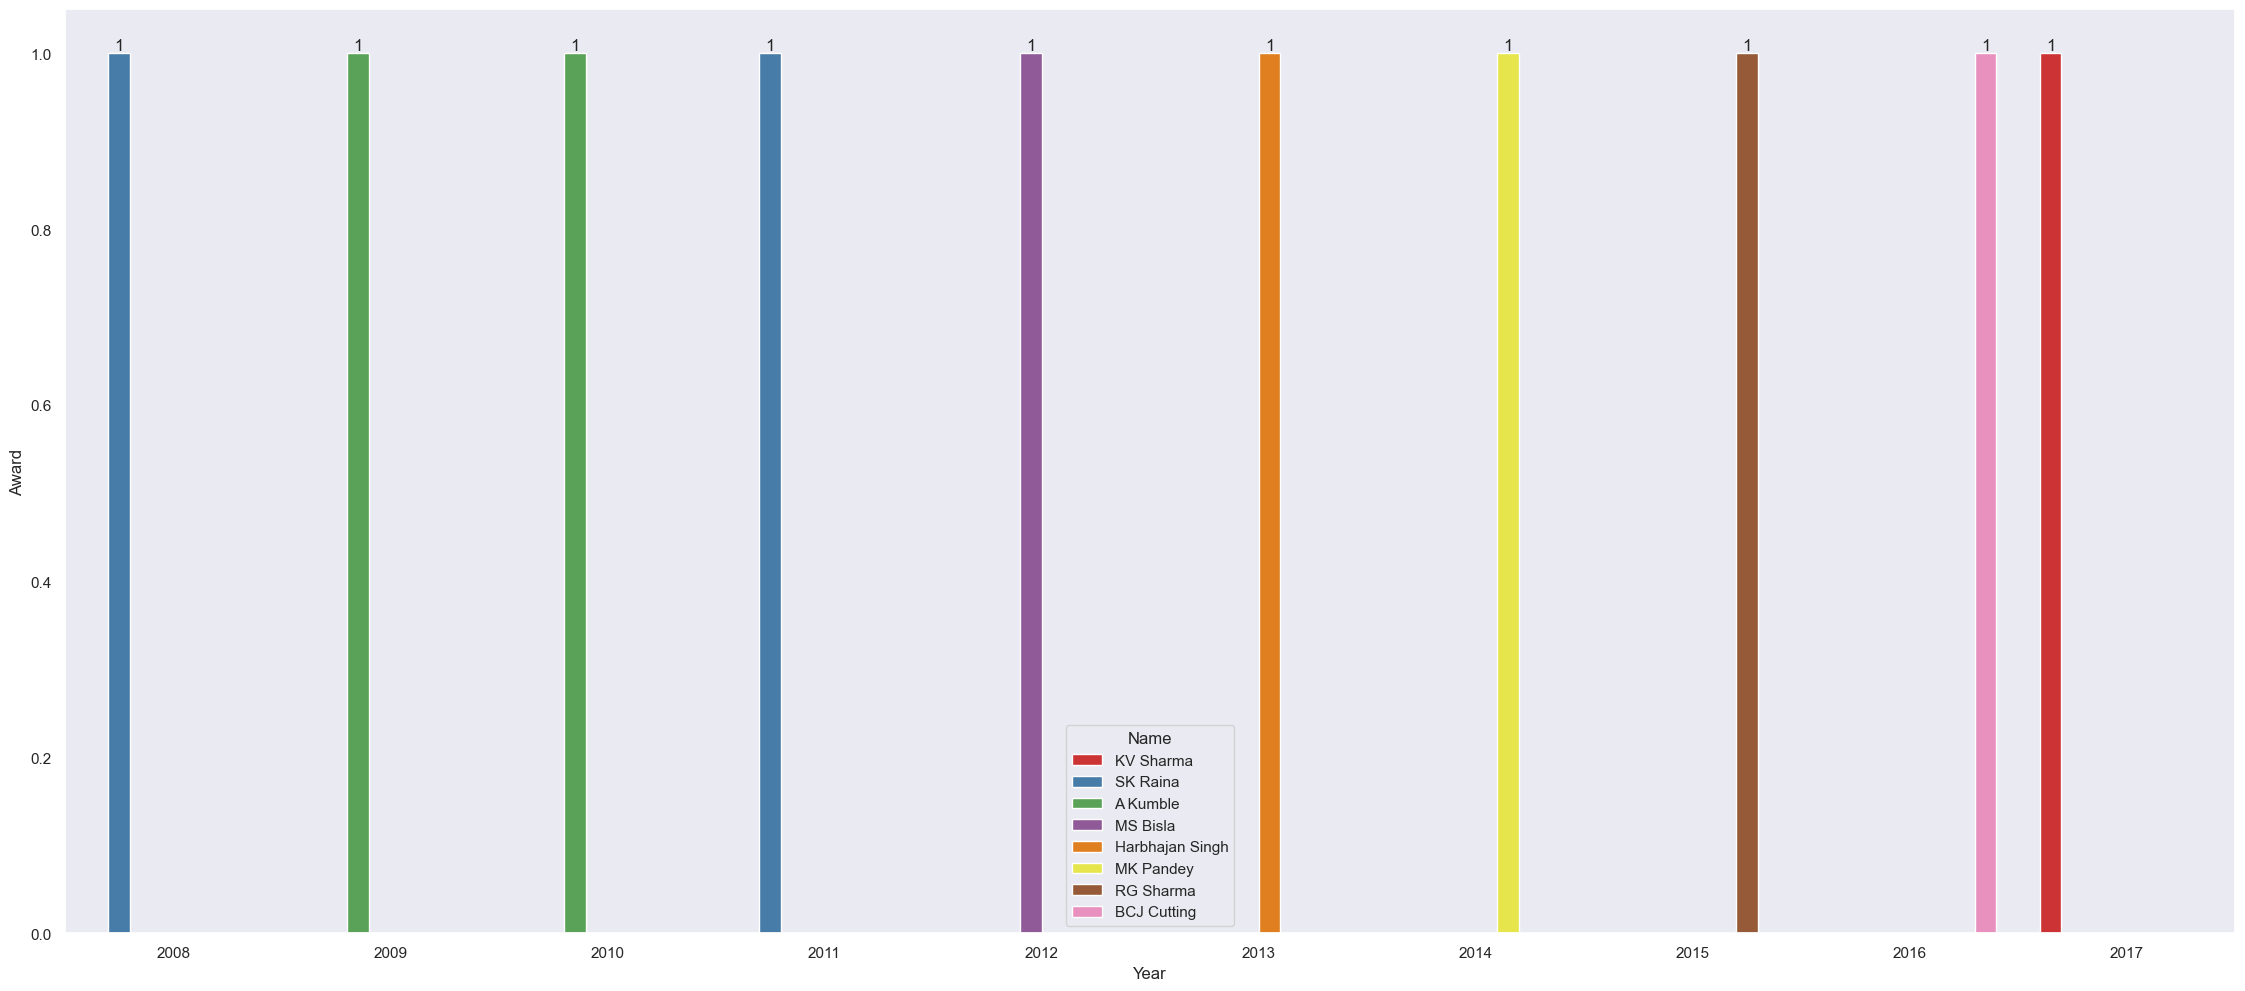

In [58]:
plt.figure(figsize=(28,12),dpi=100)
ax=sns.barplot(y='Award',x='Year',hue='Name',data=min_man_of_match,palette='Set1')
for i in ax.containers:
    ax.bar_label(i)
plt.show()    

# No of matches after toss decision from 2008-17 

In [72]:
dt.toss_decision.value_counts()

field    363
bat      273
Name: toss_decision, dtype: int64

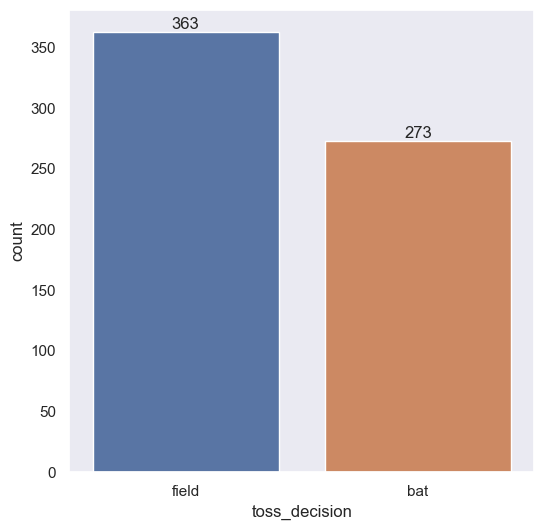

In [119]:
plt.figure(figsize=(6,6),dpi=100)
ax=sns.countplot(x='toss_decision',data=dt)
for i in ax.containers:
    ax.bar_label(i)
plt.show()

# No of match won by teams after the toss decision in the season 2017

In [59]:
dt[dt['season']==2017].groupby('toss_decision').winner.value_counts()

toss_decision  winner                     
bat            Mumbai Indians                  3
               Delhi Daredevils                2
               Royal Challengers Bangalore     2
               Sunrisers Hyderabad             2
               Kings XI Punjab                 1
               Kolkata Knight Riders           1
field          Rising Pune Supergiant         10
               Mumbai Indians                  9
               Kolkata Knight Riders           8
               Kings XI Punjab                 6
               Sunrisers Hyderabad             6
               Delhi Daredevils                4
               Gujarat Lions                   4
               Royal Challengers Bangalore     1
Name: winner, dtype: int64

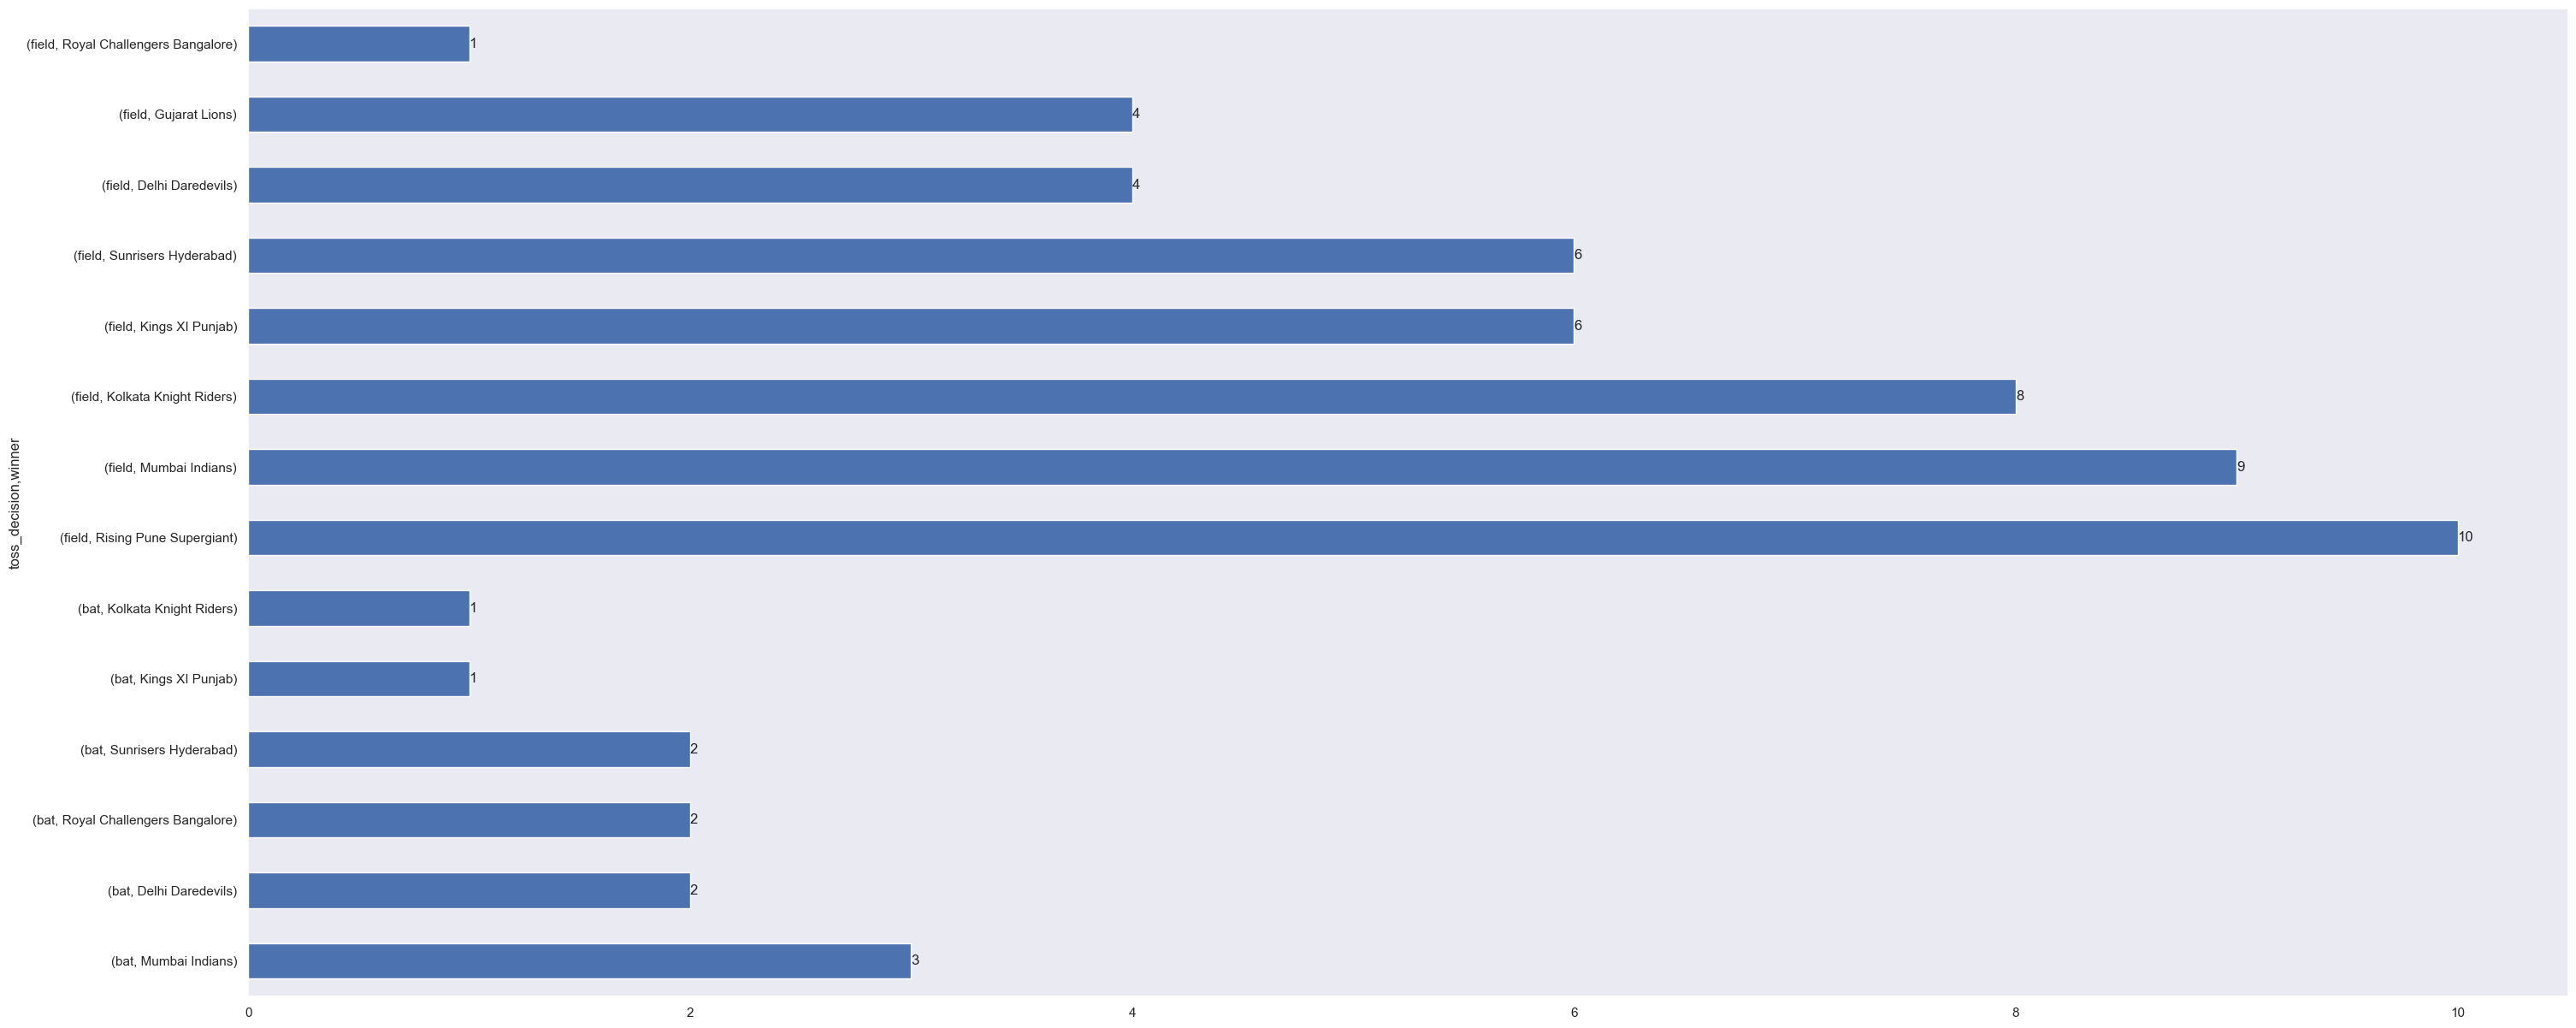

In [60]:
plt.figure(figsize=(35,15),dpi=100)
ax=dt[dt['season']==2017].groupby('toss_decision').winner.value_counts().plot.barh()
for i in ax.containers:
    ax.bar_label(i)
plt.show()

# Toss decision in each year

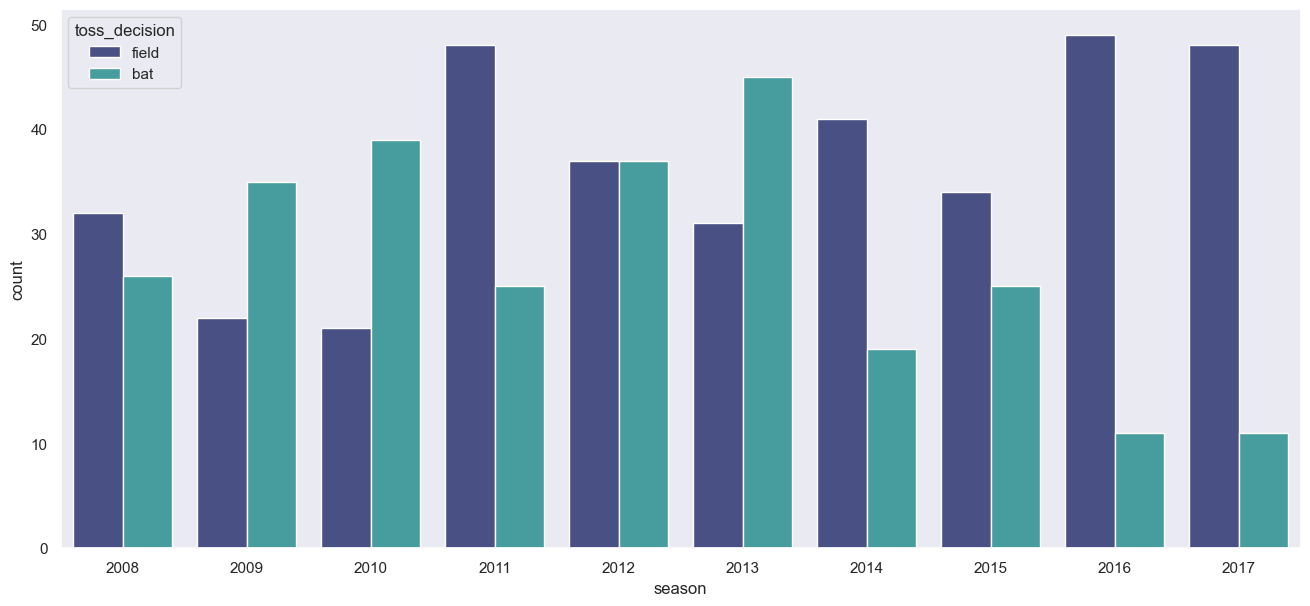

In [135]:
plt.figure(figsize=(16,7),dpi=100)
sns.countplot(x='season',data=dt,hue='toss_decision',palette='mako')
plt.show()

# Winning by wickets seasonwise and teamwise

In [146]:
df=dt[dt['season']==2016].groupby(['season','team1']).win_by_wickets.value_counts()
df

season  team1                        win_by_wickets
2016    Delhi Daredevils             0                 3
                                     6                 1
                                     7                 1
                                     9                 1
        Gujarat Lions                4                 2
                                     0                 1
                                     5                 1
                                     8                 1
                                     10                1
        Kings XI Punjab              0                 2
                                     5                 2
                                     4                 1
                                     6                 1
                                     7                 1
                                     8                 1
        Kolkata Knight Riders        6                 3
                                    